In [224]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import matplotlib.colors as mcolors
import matplotlib.markers as mmarkers
import math
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [225]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-white')
plt.rcParams['font.family'] = 'Arial'
plt.rc('axes', linewidth=0.5)

# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# MCOLORS = list(mcolors.TABLEAU_COLORS)
# MCOLORS[2:])
# MCOLORS = MCOLORS[:1] + seconds  # Removing orange lol


# COLORBLIND_WONG = [
#     '#0072B2',
#     '#D55E00',
#     '#009E73',
#     '#56B4E9',
#     '#E69F00',
#     '#000000',
#     '#117733',
#     '#DDCC77',
#     '#CC6677',
#     '#882255'
# ]

# Taken from https://personal.sron.nl/%7Epault/
# blue, red, green, yellow, purple, cyan, grey
MCOLORS = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#AA3377', '#66CCEE', '#BBBBBB', '#000000']*3

MARKERS = ['o', '^', 's', 'P', '<', 'x', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v']


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [226]:
def read_lines(file):
    with open(file, 'r') as fin:
        lines = fin.readlines()
    lines = [line.strip() for line in lines]
    return lines

def get_index_of(x, list):
    ret = -1
    for index, elem in enumerate(list):
        if x == elem:
            ret = index
    return ret

In [227]:
def plot_savefig(DIR, filename=None, name=None):
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
        
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)

        print(f"{os.path.join(DIR, name)} png and jpg")
    

def plot_file_advanced(file,
              sep=',', 
              x='x', 
              ys={'y':['y1', 'y2']}, 
              labels=['E_DNA', 'E_Ideal'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=None, 
              colors=MCOLORS,
              markers=None,
              name=None,
              text=r'text',
              legendkwargs={'loc': 'best'},
              **kwargs,
             ):
    
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    print(headers)
    data = {}
    
    timeindex = get_index_of(x, headers)
    times = []
    for row, line in enumerate(lines[1:]):
        times.append(float(line.split()[0]))
    data[x] = times
    
    
    for key, vlist in ys.items():
        indices = [get_index_of(v, headers) for v in vlist]
        sum_np = np.zeros((len(lines)-1, len(vlist)))
        for row, line in enumerate(lines[1:]):
            for col, index in enumerate(indices):
                sum_np[row, col] = line.split()[index]
    
        sum_np = np.sum(sum_np, axis=-1)
        data[key] = sum_np
                       
    df = pd.DataFrame(data)
    
    df['time'] /= 3600 # Convert to hours
    
    # Markers
    if (markers is None) or (markers==[]):
        markers=['']*len(ys)
    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        kwargs_copy = kwargs.copy()
        kwargs_copy['markevery'] = kwargs['markevery'] + (-1)**random.randint(0, 2)*random.randint(0, 15)
        plt.plot(x, y, data=df, 
                 label=labels[index], 
                 color=color, 
                 marker=markers[index],
                 linestyle=linestyles[index],
                 **kwargs_copy)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Remove spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Style the axes
    ax = plt.gca()
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=4) # Major ticks
    ax.tick_params(which='minor', length=2) # Minor ticks
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)

    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
        
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)

        print(f"{os.path.join(DIR, name)} png and jpg")
    return df

In [228]:
def plot_file_dhelper(file,
              sep=',', 
              x='x', 
              ys=['HelperCCk'], 
              labels=['d[HelperCCk]/dt'],
              xlabel='Time (hours)',
              ylabel='d[Helper]/dt (nM/hr)',
              linestyles=['solid'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    data = np.array([l.split() for l in lines[1:]])
    df = pd.DataFrame(data=data, columns=headers, dtype=np.float32)
    df['time'] /= 3600 # Convert to hours
    
    for index, y in enumerate(ys):
        times = df['time'].copy()
        values = df[y].copy()
        dvalues = values.copy()
        for i in range(1, len(values)):
#             print(values[i], values[i-1], times[i], times[i-1])
            dvalues[i] = -(float(values[i])-float(values[i-1]))/(float(times[i])-float(times[i-1]))
            if dvalues[i] > 8:
                print(dvalues[i], values[i], values[i-1], times[i], times[i-1])
        dvalues[0] = dvalues[1]
        df[f'd{y}dt'] = dvalues.copy()
    df = df.drop(index=0)

    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, f'd{y}dt', data=df, 
                 label=labels[index], 
                 color=color, 
                 linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Remove spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Style the axes
    ax = plt.gca()
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=4) # Major ticks
    ax.tick_params(which='minor', length=2) # Minor ticks
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=300, bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=300, bbox_inches='tight', pad_inches=0)
        print(f"{os.path.join(DIR, name)}.png")
    return df

In [229]:
def plot_file_dhelper(file,
              sep=',', 
              x='x', 
              ys=['HelperCCk'], 
              labels=['d[HelperCCk]/dt'],
              xlabel='Time (hours)',
              ylabel='d[Helper]/dt (nM/hr)',
              linestyles=['solid'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    data = np.array([l.split() for l in lines[1:]])
    df = pd.DataFrame(data=data, columns=headers, dtype=np.float32)
    df['time'] /= 3600 # Convert to hours
    
    for index, y in enumerate(ys):
        times = df['time'].copy()
        values = df[y].copy()
        dvalues = values.copy()
        for i in range(1, len(values)):
#             print(values[i], values[i-1], times[i], times[i-1])
            dvalues[i] = -(float(values[i])-float(values[i-1]))/(float(times[i])-float(times[i-1]))
            if dvalues[i] > 8:
                print(dvalues[i], values[i], values[i-1], times[i], times[i-1])
        dvalues[0] = dvalues[1]
        df[f'd{y}dt'] = dvalues.copy()
    df = df.drop(index=0)

    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, f'd{y}dt', data=df, 
                 label=labels[index], 
                 color=color, 
                 linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Remove spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Style the axes
    ax = plt.gca()
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=4) # Major ticks
    ax.tick_params(which='minor', length=2) # Minor ticks
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=300, bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=300, bbox_inches='tight', pad_inches=0)
        print(f"{os.path.join(DIR, name)}.png")
    return df

In [230]:
DIR='/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp'
UNIAMP_IMAGES_DIR='/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/images'
if not os.path.exists(UNIAMP_IMAGES_DIR):
    os.mkdirs(UNIAMP_IMAGES_DIR)

['time', 'Cj', 'Ck']
['time', 'Cj', 'Ck']
['time', 'Cj', 'Ck']
['time', 'Cj', 'Ck']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
['time', 'Cj', 'Ck', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/images/uniamp_juxtaposed png and jpg


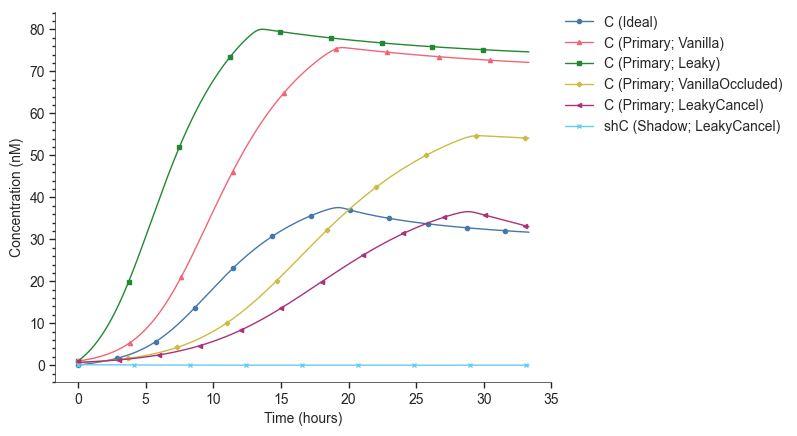

In [99]:
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}
legendkwargs = {'bbox_to_anchor': (1.28, 0.9), 'loc': "upper right", 'bbox_transform': plt.gcf().transFigure}

index = 0

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/original/plots/original', 
               x='time', 
               ys={
                   
                   'O': ['O1'],
               },
               labels=['C (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid'],
               colors=[MCOLORS[index]],
               markers=[MARKERS[index]],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               legendkwargs=legendkwargs,
               **kwargs)

index += 1
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
               },
               labels=['C (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid'],
               colors=[MCOLORS[index]],
               markers=[MARKERS[index]],               
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
legendkwargs=legendkwargs,
               **kwargs)

index += 1

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky/plots/leaky', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
               },
               labels=['C (Primary; Leaky)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid'],
               colors=[MCOLORS[index]],
               markers=[MARKERS[index]],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
legendkwargs=legendkwargs,
               **kwargs)

index += 1

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/occluded/plots/occluded', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
               },
               labels=['C (Primary; VanillaOccluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid'],
               colors=[MCOLORS[index]],
               markers=[MARKERS[index]],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
legendkwargs=legendkwargs,
               **kwargs)

index +=1 

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky_shadow/plots/leaky_shadow', 
        x='time', 
        ys={
        'C': ['Cj', 'Ck'],
        },
        labels=['C (Primary; LeakyCancel)'],
        xlabel='Time (hours)',
        ylabel='Concentration (nM)',
        linestyles=['solid'],
        colors=MCOLORS[index:],
        markers=MARKERS[index:],
        text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
legendkwargs=legendkwargs,
        **kwargs
)

index += 1

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky_shadow/plots/leaky_shadow', 
        x='time', 
        ys={
        'shC': ['shCj', 'shCk'],
        },
        labels=['shC (Shadow; LeakyCancel)'],
        xlabel='Time (hours)',
        ylabel='Concentration (nM)',
        linestyles=['solid'],
       colors=[MCOLORS[index]],
       markers=[MARKERS[index]],
        text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
legendkwargs=legendkwargs,
        **kwargs
)

plot_savefig(UNIAMP_IMAGES_DIR, name='uniamp_juxtaposed')

# Biamp

In [328]:
FOLDER='biamp'
BIAMP_IMAGES_DIR='/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/images'

['time', 'Cj', 'Ck', 'Br']
['time', 'Cj', 'Ck', 'Br']
['time', 'Cj', 'Ck', 'Br']
['time', 'Cj', 'Ck', 'Br']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/occluded/plots/occluded png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow png and jpg


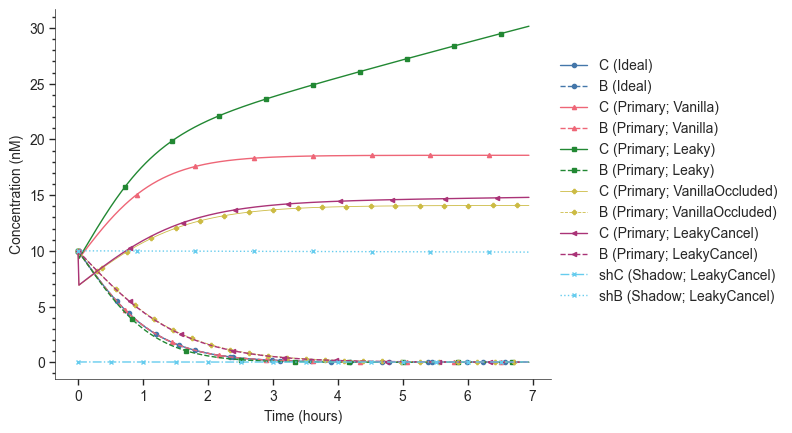

In [333]:
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}
legendkwargs = {'bbox_to_anchor': (1.48, 0.9), 'loc':'upper right'}

index = 0
marker_index = 0

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'O1': ['O1'],
                   'O2': ['O2'],
               },
               labels=['C (Ideal)', 'B (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br']
               },
               labels=['C (Primary; Vanilla)', 'B (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
            legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky/plots/leaky', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Primary; Leaky)', 'B (Primary; Leaky)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                        legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/occluded/plots/occluded', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Primary; VanillaOccluded)', 'B (Primary; VanillaOccluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               name='occluded',
               **{
                    'markersize': 3, 
                    'markevery': 30,
                    'linewidth': 0.6
                 })
index +=1
marker_index += 1

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Primary; LeakyCancel)', 'B (Primary; LeakyCancel)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               name='leaky_shadow',
               **kwargs)
index += 1
marker_index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
                ys={
                   'shC': ['shCj', 'shCk'],
                   'shB': ['shBr'],
               },
               labels=['shC (Shadow; LeakyCancel)', 'shB (Shadow; LeakyCancel)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',

               linestyles=['dashdot', 'dotted'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               name='leaky_shadow',
               **kwargs)

plot_savefig(BIAMP_IMAGES_DIR, 'biamp_juxtaposed')

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']


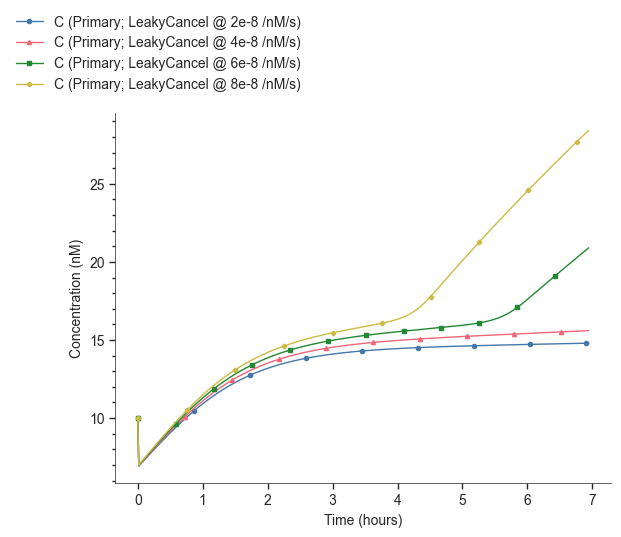

In [339]:
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}
legendkwargs = {'bbox_to_anchor': (0.4, 1.3), 'loc':'upper right'}

index = 0
marker_index = 0

for i in range(2, 9, 2):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/leaky_shadow_{i}e-8', 
                   x='time', 
                   ys={
                       'C': ['Cj', 'Ck'],
#                        'B': ['Br']
                   },
                   labels=[f'C (Primary; LeakyCancel @ {i}e-8 /nM/s)', f'B (Primary; LeakyCancel @ {i}e-8 /nM/s)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'dashed'],
                   colors=[MCOLORS[index]]*2,
                   markers=[MARKERS[marker_index]]*2,
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
    
    index += 1
    marker_index += 1
plot_savefig(BIAMP_IMAGES_DIR, 'biamp_leaky_shadow_moreleak_juxtaposed')

# RPS V2

In [246]:
REG_FOLDER='rps_v2'
RPS_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/images'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/original/plots/original png and jpg


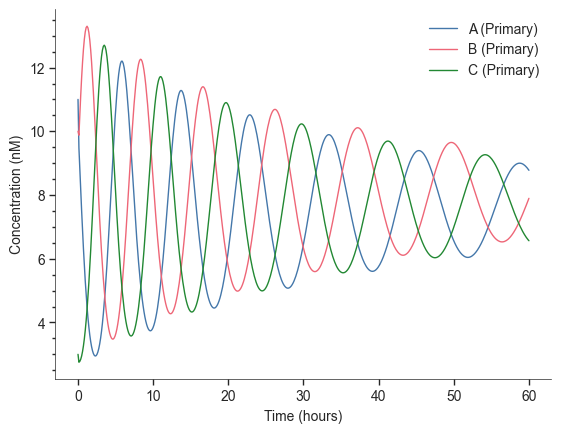

In [248]:
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='original',
               markers=[],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


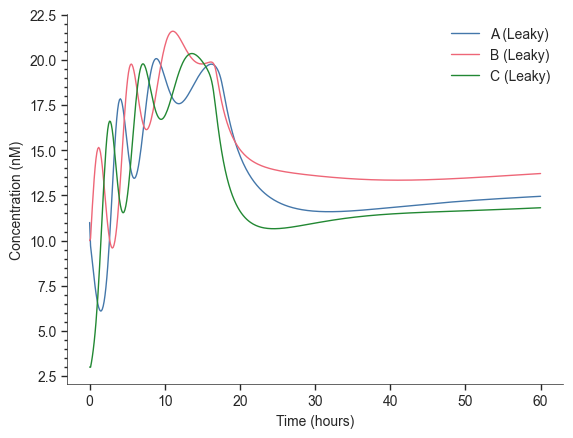

In [249]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Leaky)', 'B (Leaky)', 'C (Leaky)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=[],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


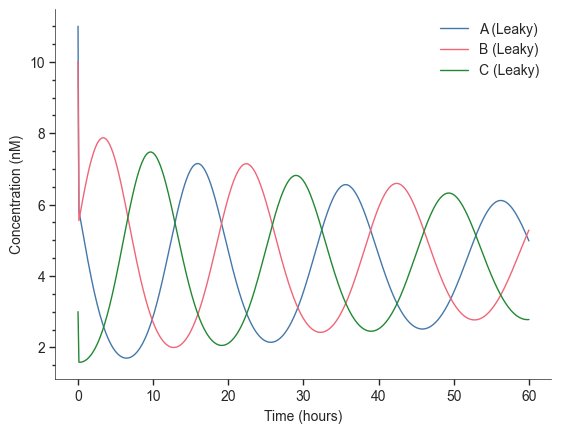

In [250]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Leaky)', 'B (Leaky)', 'C (Leaky)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=[],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'occluded')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


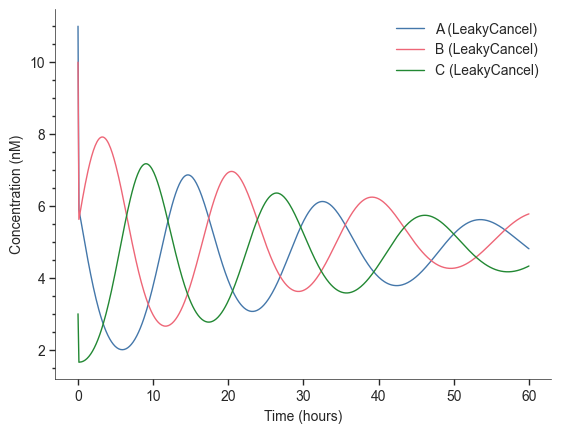

In [251]:

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow', 
              x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (LeakyCancel)', 'B (LeakyCancel)', 'C (LeakyCancel)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=[],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky_shadow')

In [242]:
REG_FOLDER='rps_v2_nobuffer'
RPS_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/images'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


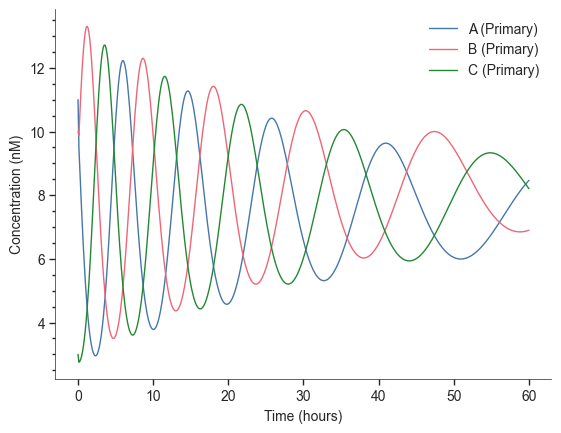

In [243]:
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


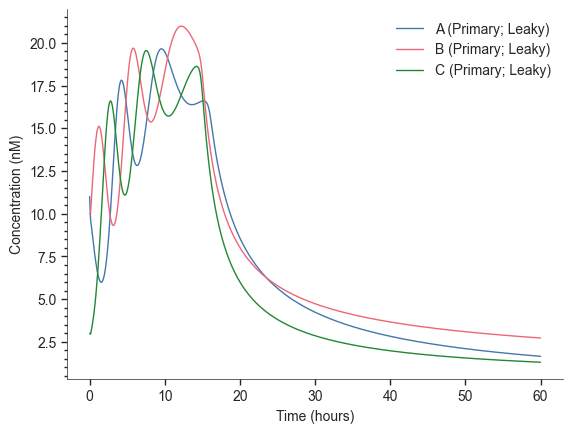

In [236]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary; Leaky)', 'B (Primary; Leaky)', 'C (Primary; Leaky)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=[],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


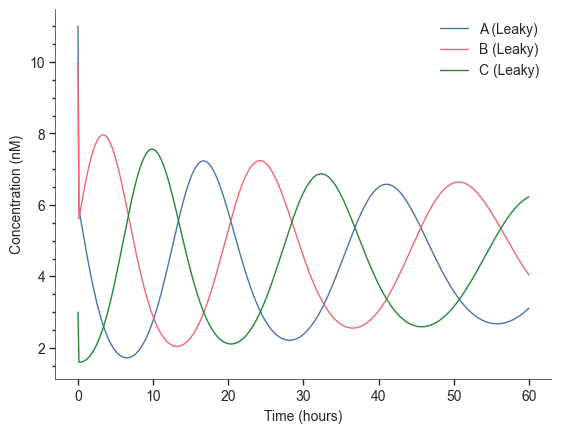

In [237]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Leaky)', 'B (Leaky)', 'C (Leaky)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=[],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'occluded')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


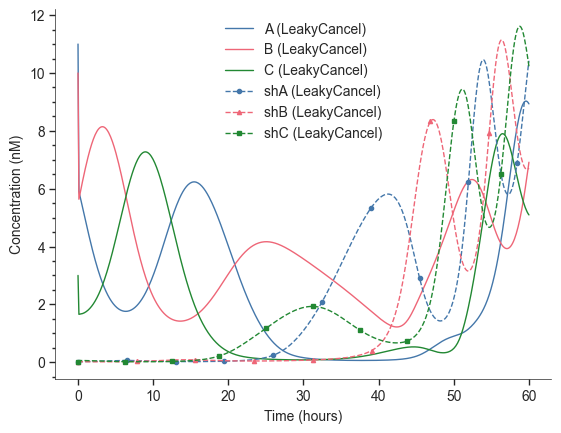

In [239]:

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow', 
              x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk']
               },
               labels=['A (LeakyCancel)', 'B (LeakyCancel)', 'C (LeakyCancel)', 
                       'shA (LeakyCancel)', 'shB (LeakyCancel)', 'shC (LeakyCancel)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               colors=MCOLORS[:3]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=['', '', ''] + MARKERS[:3],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky_shadow')

## Toehold Occlusion

In [252]:
FOLDER='rps_v2'
SUBFOLDER = 'leaky_shadow_toeocc'
RPS_TOEOCC_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/images/'
if not os.path.exists(RPS_TOEOCC_IMAGES_DIR):
    os.makedirs(RPS_TOEOCC_IMAGES_DIR)
    
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_40nM png and jpg


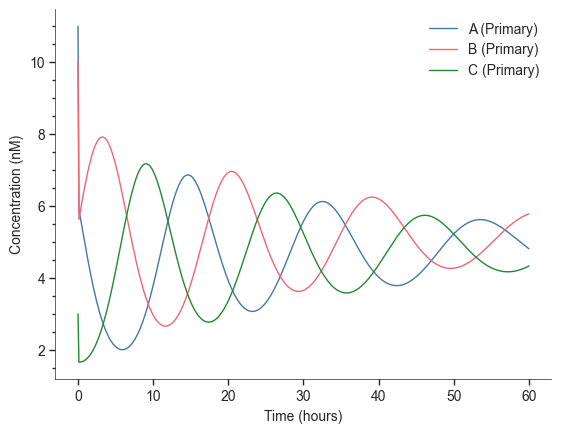

In [258]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_60nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_40nM',
               markers=[],
               **kwargs)
plot_savefig(RPS_TOEOCC_IMAGES_DIR, 'leaky_shadow_toeocc_60nM')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_100nM png and jpg


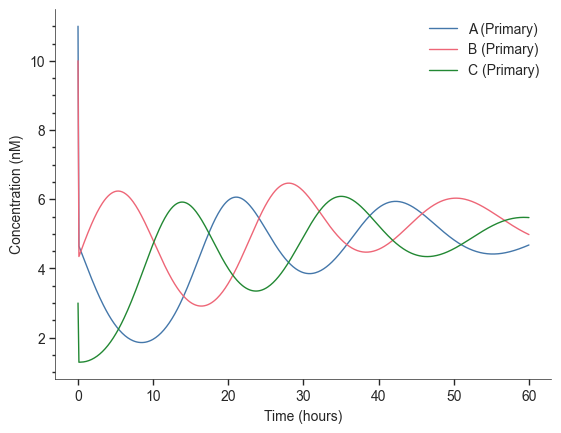

In [259]:
CANCEL='100'
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/main_cancel_{CANCEL}nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name=f'leaky_shadow_toeocc_{CANCEL}nM',
               markers=[],
               **kwargs)
plot_savefig(RPS_TOEOCC_IMAGES_DIR, f'leaky_shadow_toeocc_{CANCEL}nM')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_300nM png and jpg


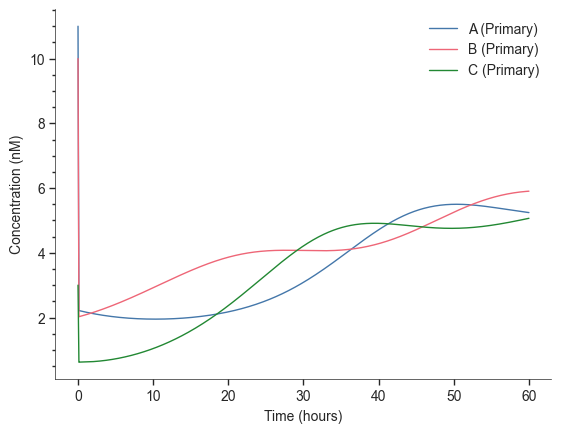

In [260]:

CANCEL='300'
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/main_cancel_{CANCEL}nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name=f'leaky_shadow_toeocc_{CANCEL}nM',
               markers=[],
               **kwargs)
plot_savefig(RPS_TOEOCC_IMAGES_DIR, f'leaky_shadow_toeocc_{CANCEL}nM')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_600nM png and jpg


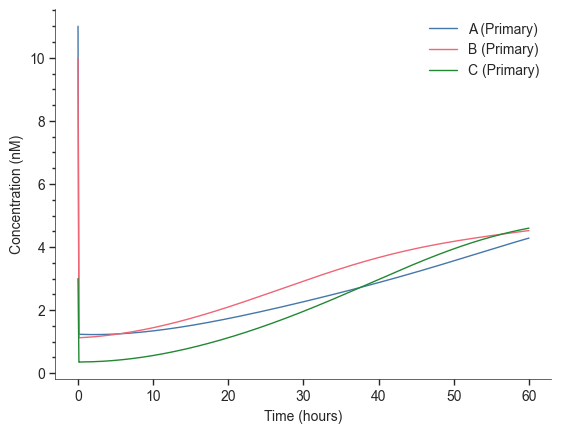

In [261]:
CANCEL='600'
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/main_cancel_{CANCEL}nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name=f'leaky_shadow_toeocc_{CANCEL}nM',
               markers=[],
               **kwargs)
plot_savefig(RPS_TOEOCC_IMAGES_DIR, f'leaky_shadow_toeocc_{CANCEL}nM')

# Consensus

In [262]:
FOLDER='con_v3'
CON_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'
if not os.path.exists(CON_IMAGES_DIR):
    os.mkdir(CON_IMAGES_DIR)

kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}

['time', 'OA', 'OB', 'OY']


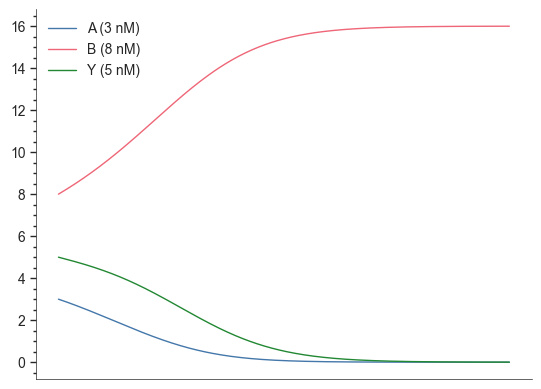

In [263]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/ideal', 
               x='time', 
               ys={
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)'],
               xlabel='',
               ylabel='',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               markers=[],
               **kwargs)
# plt.legend().set_visible(False)
plt.xticks([])
# plt.yticks([])
plot_savefig(CON_IMAGES_DIR, 'ideal')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']


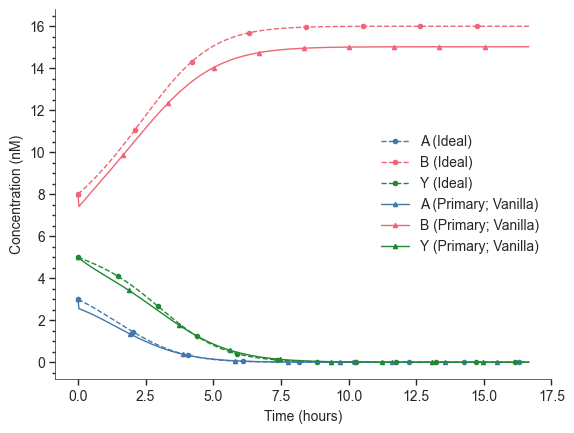

In [264]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                    'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=[ 'A (Ideal)', 'B (Ideal)', 'Y (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[MARKERS[0]]*3,
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A (Primary; Vanilla)', 'B (Primary; Vanilla)', 'Y (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[MARKERS[1]]*3,
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']


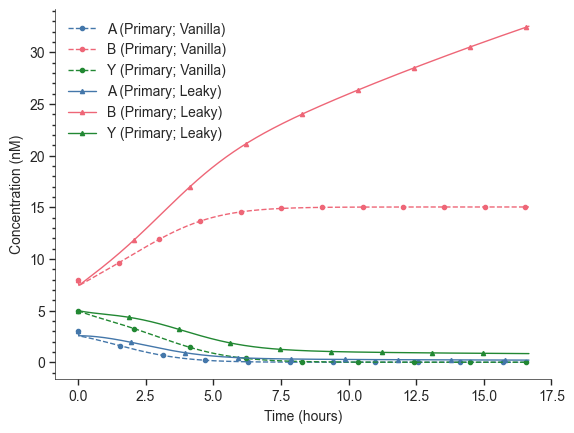

In [265]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A (Primary; Vanilla)', 'B (Primary; Vanilla)', 'Y (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[MARKERS[0]]*3,
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A (Primary; Leaky)', 'B (Primary; Leaky)', 'Y (Primary; Leaky)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                markers=[MARKERS[1]]*3,
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'shAp', 'shAq', 'shBr', 'shBs', 'shYi', 'shYj']


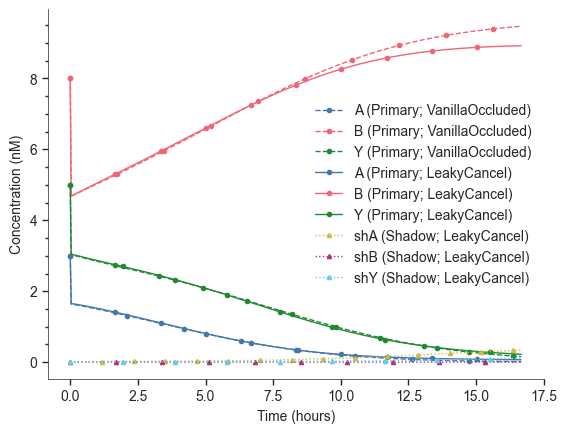

In [266]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A (Primary; VanillaOccluded)', 'B (Primary; VanillaOccluded)', 'Y (Primary; VanillaOccluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'dashed'],
               markers=[MARKERS[0]]*3,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shY': ['shYi', 'shYj'],
               },
               labels=['A (Primary; LeakyCancel)', 'B (Primary; LeakyCancel)', 'Y (Primary; LeakyCancel)', 'shA (Shadow; LeakyCancel)', 'shB (Shadow; LeakyCancel)', 'shY (Shadow; LeakyCancel)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
               markers=[MARKERS[0]]*3 + [MARKERS[1]]*3,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

plot_savefig(CON_IMAGES_DIR, 'leaky_shadow')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj']


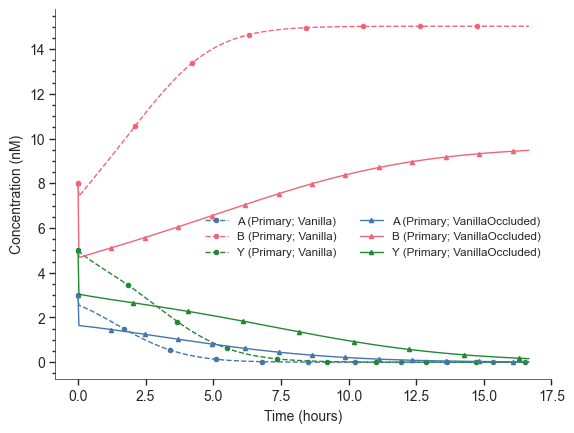

In [267]:
legendkwargs = {'ncols': 2, "loc": 'lower right', 'bbox_to_anchor': (1.0, 0.3), 'fontsize': 'small'}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A (Primary; Vanilla)', 'B (Primary; Vanilla)', 'Y (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'dashed'],
               markers=[MARKERS[0]]*3,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A (Primary; VanillaOccluded)', 'B (Primary; VanillaOccluded)', 'Y (Primary; VanillaOccluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               markers=[MARKERS[1]]*3,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               legendkwargs=legendkwargs,
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'occluded')

# Perturbation

In [304]:
FOLDER='rps_v2_pert'
RPS_PERT_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/images'

if not os.path.exists(RPS_PERT_IMAGES_DIR):
    os.makedirs(RPS_PERT_IMAGES_DIR)

    
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/original/plots/rps_v2_pert_original png and jpg


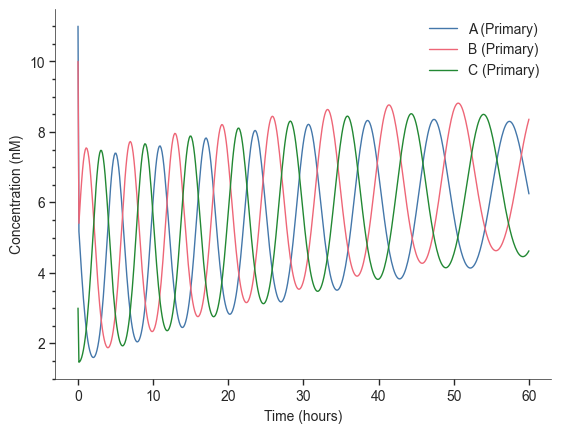

In [305]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_v2_pert_original',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_v2_pert_original')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_original_shadow_pert-1X_cancel png and jpg


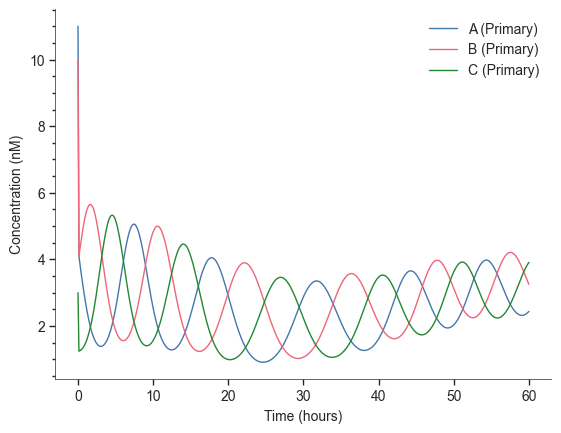

In [306]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
#                    'cancel': ['CancelC']
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)', 'CancelC'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-1X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-1X_cancel')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_original_shadow_pert-1.5X_cancel png and jpg


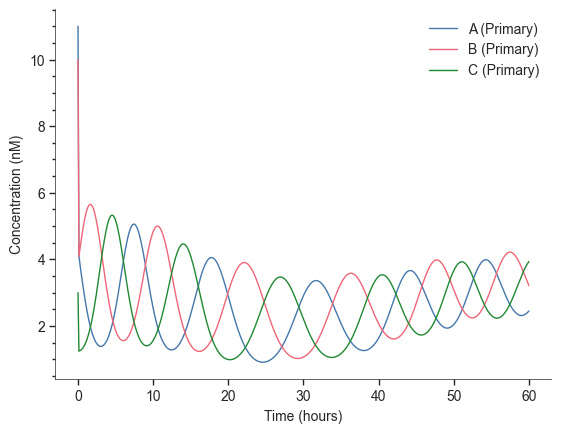

In [307]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-1.5X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-1.5X_cancel')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_original_shadow_pert-2X_cancel png and jpg


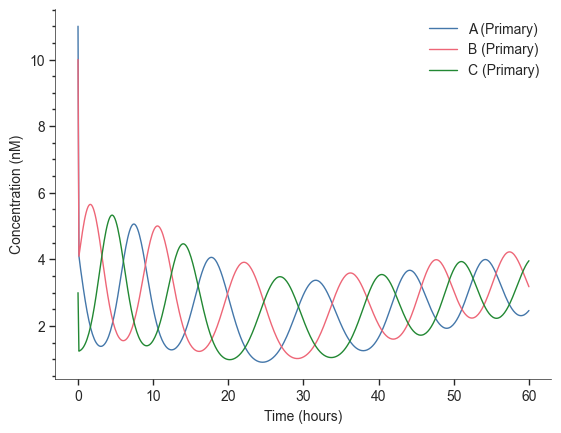

In [308]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-2X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-2X_cancel')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_original_shadow_pert-5X_cancel png and jpg


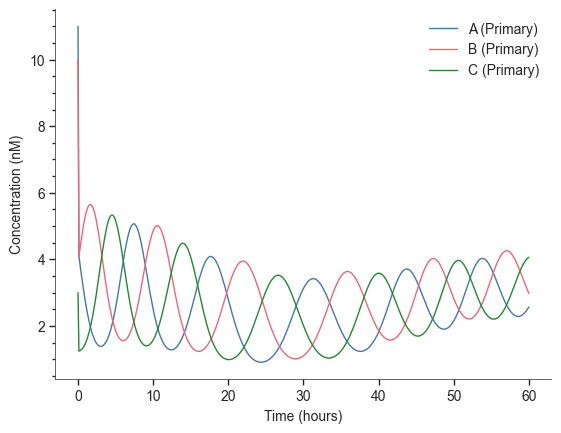

In [309]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-5X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-5X_cancel')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/9/plots/rps_original_shadow_pert-10X_cancel png and jpg


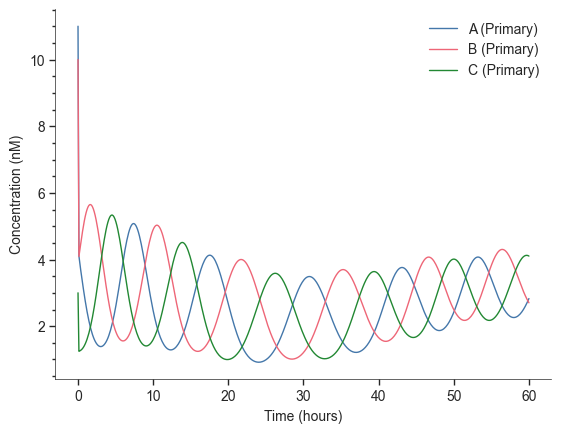

In [317]:
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
#                    'Cancel': ['shAp', 'shAq']
               },
               labels=['A (Primary)', 'B (Primary)', 'C (Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-10X_cancel',
               **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_original_shadow_pert-10X_cancel')

### Leaks under Perturbation and Shadow Cancellation

Here, we measure the leak in different cases of Perturbation with and without shadow cancellation. This shows that while in the absence of shadow cancellation the leak is amplified exponentially, in the presence of shadow cancellation, the leak is amplified subexponentially. This can be captured by the behavior of the shadow signal strands. 

In [311]:
kwargs = {
    'markersize': 3, 
    'markevery': 40,
    'linewidth': 1
}

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_nocancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_orig_shadow_pert_nocancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_nocancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']

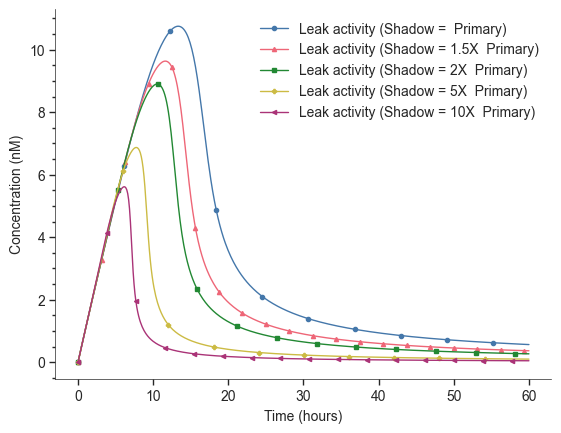

In [312]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'Leak activity (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name='rps_orig_shadow_pert_nocancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_orig_shadow_pert_nocancel_zeroconc')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/

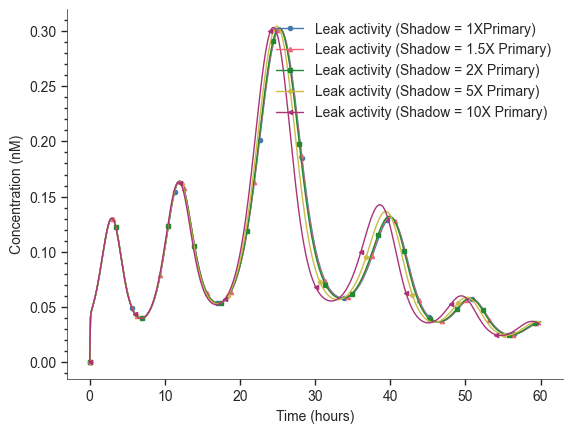

In [313]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = [ '1X', '1.5X ', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak activity (Shadow = {labels[index]}Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name=f'rps_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_orig_shadow_pert_cancel_zeroconc')

## Plot combined

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', '

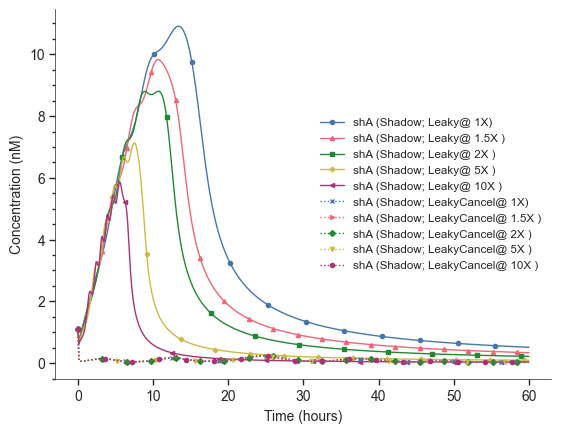

In [314]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 1, 'loc':'center right', 'fontsize':'small'}
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shA (Shadow; Leaky@ {labels[index]})'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name='rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs_copy = kwargs.copy()
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shA (Shadow; LeakyCancel@ {labels[index]})'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dotted'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[len(perts) + index]],
                   name=f'rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs_copy)
plot_savefig(RPS_PERT_IMAGES_DIR, 'rps_orig_shadow_pert_nocancel_cancel_combined')

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/9/plots/rps_orig_shadow_pert_cancel_10X_withprimary png and jpg


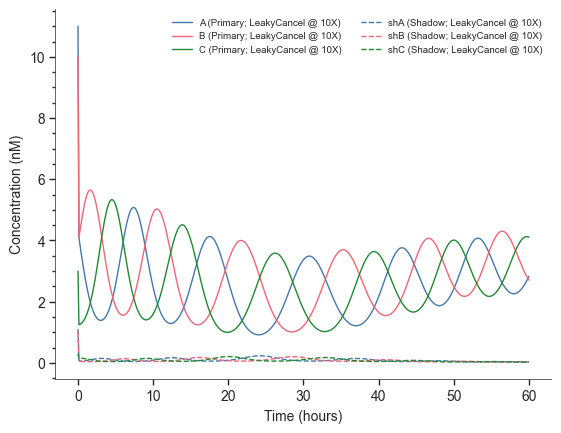

In [315]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['9']
labels = ['10X']
legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize':'x-small'}

X = 'time'

Ys = {
        'A': ['Ap', 'Aq'],
        'B': ['Br', 'Bs'],
        'C': ['Cj', 'Ck'],
        'shA': ['shAp', 'shAq'],
        'shB': ['shBr', 'shBs'],
        'shC': ['shCj', 'shCk']
     }
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} (Primary; LeakyCancel @ {labels[index]})' for y in list(Ys.keys())[:3]] + 
                            [f'{y} (Shadow; LeakyCancel @ {labels[index]})' for y in list(Ys.keys())[3:]],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'], 
                   colors=MCOLORS[:3]*2,
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
plot_savefig(RPS_PERT_IMAGES_DIR, f'rps_orig_shadow_pert_cancel_{labels[0]}')

## BIAMP Perturbation Experimentsy

In [340]:
FOLDER = 'biamp_pert'
BIAMP_PERT_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/images/'
if not os.path.exists(BIAMP_PERT_IMAGES_DIR):
    os.makedirs(BIAMP_PERT_IMAGES_DIR)
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']


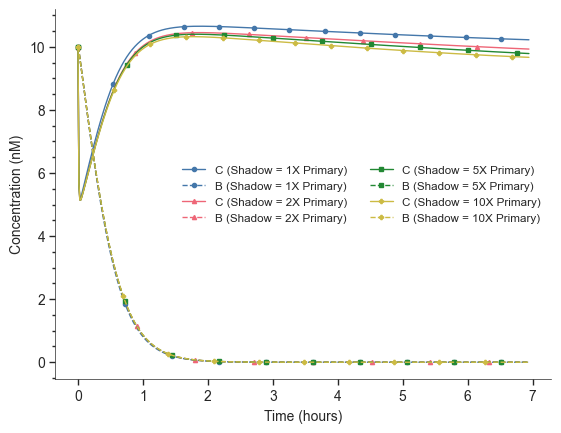

In [342]:

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'small'}

index = 0
marker_index = 0

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br']
               },
               labels=['C (Shadow = 1X Primary)', 'B (Shadow = 1X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
            legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Shadow = 2X Primary)', 'B (Shadow = 2X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)
index +=1
marker_index += 1

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Shadow = 5X Primary)', 'B (Shadow = 5X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=[MARKERS[marker_index]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)
index += 1
marker_index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Shadow = 10X Primary)', 'B (Shadow = 10X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',

               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=MARKERS[marker_index]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)

plot_savefig(BIAMP_PERT_IMAGES_DIR, 'biamp_pert_juxtaposed')

In [ ]:

legendkwargs = {'ncols': 2, 'loc':'best', 'fontsize': 'small'}

index = 0
marker_index = 0

# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_cancel', 
#                x='time', 
#                ys={
#                    'C': ['Cj', 'Ck'],
#                    'B': ['Br']
#                },
#                labels=['C (Shadow = 1X Primary)', 'B (Shadow = 1X Primary)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'dashed'],
#                colors=[MCOLORS[index]]*2,
#                markers=[MARKERS[marker_index]]*2,
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#             legendkwargs=legendkwargs,
#                **kwargs)
# index += 1
# marker_index += 1

# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
#                x='time', 
#                ys={
#                    'C': ['Cj', 'Ck'],
#                    'B': ['Br'],
#                },
#                labels=['C (Shadow = 2X Primary)', 'B (Shadow = 2X Primary)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'dashed'],
#                colors=[MCOLORS[index]]*2,
#                markers=[MARKERS[marker_index]]*2,
#                text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
#                 legendkwargs=legendkwargs,
#                **kwargs)
# index +=1
# marker_index += 1

# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
#                x='time', 
#                 ys={
#                    'C': ['Cj', 'Ck'],
#                    'B': ['Br'],
#                },
#                labels=['C (Shadow = 5X Primary)', 'B (Shadow = 5X Primary)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'dashed'],
#                colors=[MCOLORS[index]]*2,
#                markers=[MARKERS[marker_index]]*2,
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                 legendkwargs=legendkwargs,
#                **kwargs)
index += 1
marker_index += 1
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
               x='time', 
                ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
               },
               labels=['C (Shadow = 10X Primary)', 'B (Shadow = 10X Primary)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',

               linestyles=['solid', 'dashed'],
               colors=[MCOLORS[index]]*2,
               markers=MARKERS[marker_index]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                legendkwargs=legendkwargs,
               **kwargs)

plot_savefig(BIAMP_PERT_IMAGES_DIR, 'biamp_pert_juxtaposed')

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/0_0/plots/biamp_orig_shadow_pert_nocancel png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/1/plots/biamp_orig_shadow_pert_nocancel png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/4/plots/biamp_orig_shadow_pert_nocancel png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/9/plots/biamp_orig_shadow_pert_nocancel png and jpg


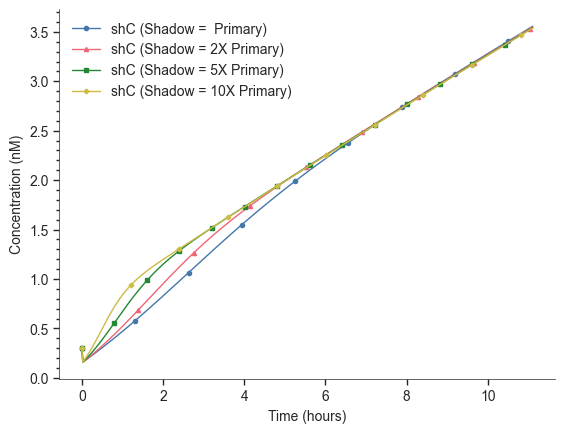

In [322]:
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}
perts = ['0_0', '1', '4', '9']
labels = ['', '2X', '5X', '10X']
dfs_nocancel = []
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name='biamp_orig_shadow_pert_nocancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)
    
plot_savefig(BIAMP_PERT_IMAGES_DIR, 'orig_shadow_pert_nocancel')

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/0_0/plots/biamp_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/1/plots/biamp_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/4/plots/biamp_orig_shadow_pert_cancel_zeroconc png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/9/plots/biamp_orig_shadow_pert_cancel_zeroconc png and jpg


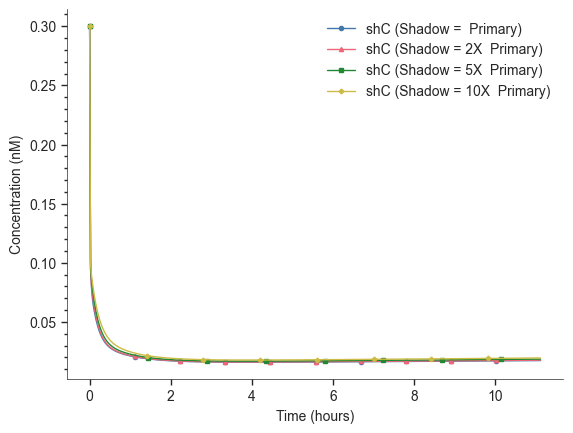

In [323]:
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}
perts = ['0_0', '1', '4', '9']
labels = ['', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name=f'biamp_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)
plot_savefig(BIAMP_PERT_IMAGES_DIR, 'orig_shadow_pert_cancel_zeroconc')

## Plot combined

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/0_0/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/1/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/4/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/9/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert/0_0/plots/biamp_orig_shadow_pert_nocancel_cancel_combined png and jpg
['time', 'Cj', 'Ck', 'Br', 'shCj', '

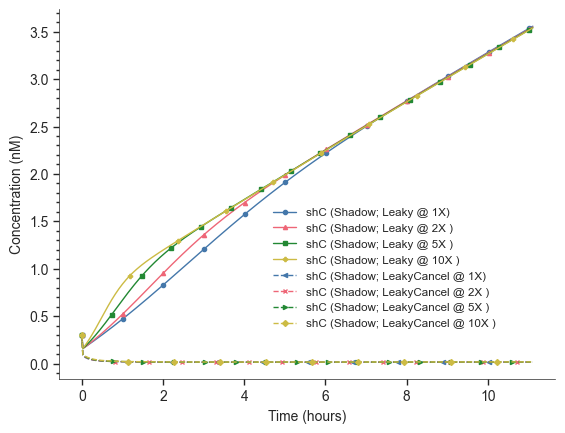

In [324]:
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}
perts = ['0_0', '1', '4', '9']
labels = ['1X', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 1, 'loc':'center right', 'fontsize':'small', 'bbox_to_anchor': (0.9, 0.3)}
for index, pert in enumerate(perts):
    kwargs_copy = kwargs.copy()
    kwargs_copy['markevery'] -= random.randint(0, 10)
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow; Leaky @ {labels[index]})'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[index]],
                   name='biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs_copy)
for index, pert in enumerate(perts):
    kwargs_copy = kwargs.copy()
    kwargs_copy['markevery'] -= random.randint(0, 10)
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow; LeakyCancel @ {labels[index]})'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[MCOLORS[index]],
                   markers=[MARKERS[len(perts) + index]],
                   name=f'biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs_copy)
plot_savefig(BIAMP_PERT_IMAGES_DIR, 'orig_shadow_pert_nocancel_cancel_combined')

###  At a particular perturbation plot all the three species

# Catalysis, Annihilation, and Degradation

In [210]:
FOLDER = 'control_v2'
CONTROL_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/images'
if not os.path.exists(CONTROL_IMAGES_DIR):
    os.mkdir(CONTROL_IMAGES_DIR)
kwargs = {
    'markersize': 3, 
    'markevery': 40,
    'linewidth': 1
}

['time', 'X1', 'X2', 'O1', 'O2']


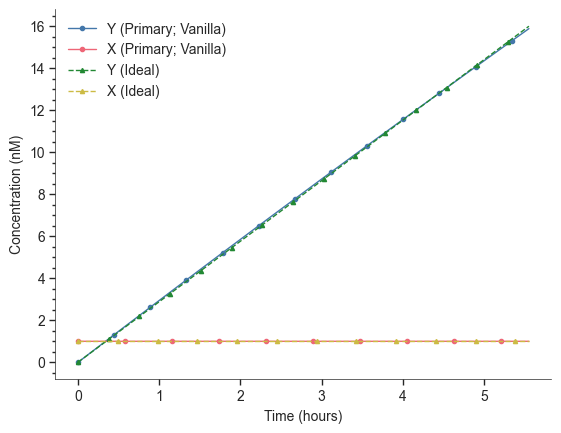

In [211]:
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r1_cat', 
               x='time', 
               ys={
                   'X2': ['X2'],
                   'X1': ['X1'],
                   'O2': ['O2'],
                   'O1': ['O1'],
               },
               labels=['Y (Primary; Vanilla)', 'X (Primary; Vanilla)', 'Y (Ideal)', 'X (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               markers=[MARKERS[0]]*2 + [MARKERS[1]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
# plt.title(r'Catalysis: $X xrightarrow[0]{k} X + Y$')
plot_savefig(CONTROL_IMAGES_DIR, 'r1_cat')

['time', 'X1', 'O1']


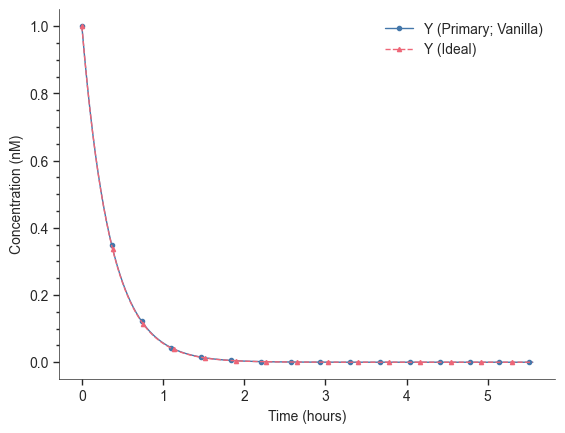

In [212]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r4_deg', 
               x='time', 
               ys={
                   'X1': ['X1'],
                   'O1': ['O1']
               },
               labels=['Y (Primary; Vanilla)', 'Y (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               markers=[MARKERS[0]] + [MARKERS[1]],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'r4_deg')

['time', 'X1', 'X2', 'O1', 'O2']


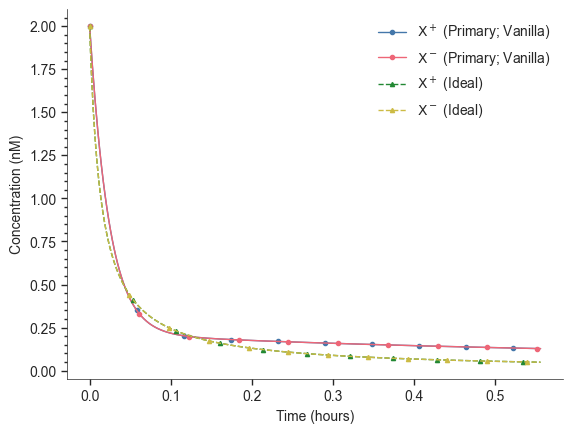

In [213]:
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r11_ann', 
               x='time', 
               ys={
                   'X2': ['X2'],
                   'X1': ['X1'],
                   'O2': ['O2'],
                   'O1': ['O1'],
               },
               labels=['$\mathrm{X^+}$ (Primary; Vanilla)', '$\mathrm{X^-}$ (Primary; Vanilla)', '$\mathrm{X^+}$ (Ideal)', '$\mathrm{X^-}$ (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
                markers=[MARKERS[0]]*2 + [MARKERS[1]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'r11_ann')

# Control

['time', 'Yp', 'Ideal_Yp', 'Xp', 'Ideal_Xp', 'Vp', 'Ideal_Vp', 'Rp', 'Ideal_Rp']


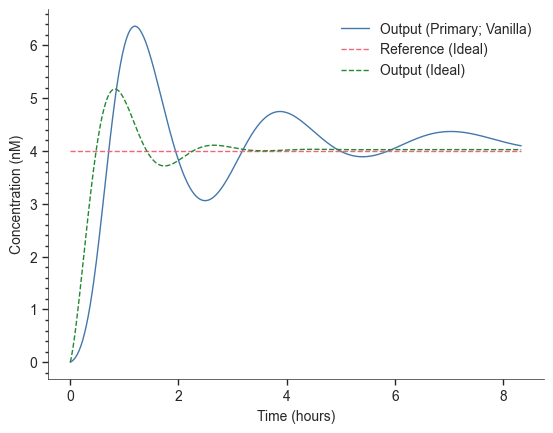

In [214]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal', 
               x='time', 
               ys={
                   'Yp': ['Yp'],
                   'Ideal_Rp': ['Ideal_Rp'],
                   'Ideal_Yp': ['Ideal_Yp']
               },
               labels=['Output (Primary; Vanilla)', 'Reference (Ideal)', 'Output (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
#                markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'original')

['time', 'Yp', 'Ideal_Yp', 'Xp', 'Ideal_Xp', 'Vp', 'Ideal_Vp', 'Rp', 'Ideal_Rp']


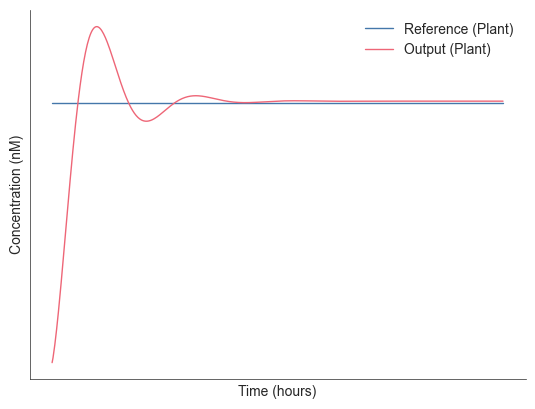

In [215]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal', 
               x='time', 
               ys={
                   'Ideal_Rp': ['Ideal_Rp'],
                   'Ideal_Yp': ['Ideal_Yp']
               },
               labels=['Reference (Plant)', 'Output (Plant)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
#                markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plt.xticks([])
plt.yticks([])
plot_savefig(CONTROL_IMAGES_DIR, 'ideal')

['time', 'Yp', 'Ideal_Yp', 'Xp', 'Ideal_Xp', 'Vp', 'Ideal_Vp', 'Rp', 'Ideal_Rp']


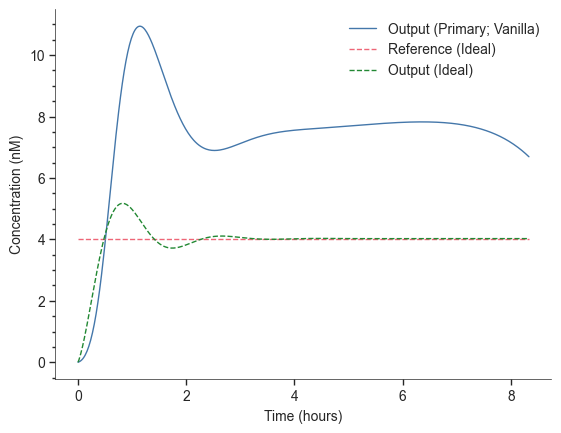

In [216]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky', 
               x='time', 
               ys={
                   'Yp': ['Yp'],
                   'Ideal_Rp': ['Ideal_Rp'],
                   'Ideal_Yp': ['Ideal_Yp']
               },
               labels=['Output (Primary; Vanilla)', 'Reference (Ideal)', 'Output (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
#                markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'leaky')

['time', 'Yp', 'Ideal_Yp', 'Xp', 'Ideal_Xp', 'Vp', 'Ideal_Vp', 'Rp', 'Ideal_Rp']


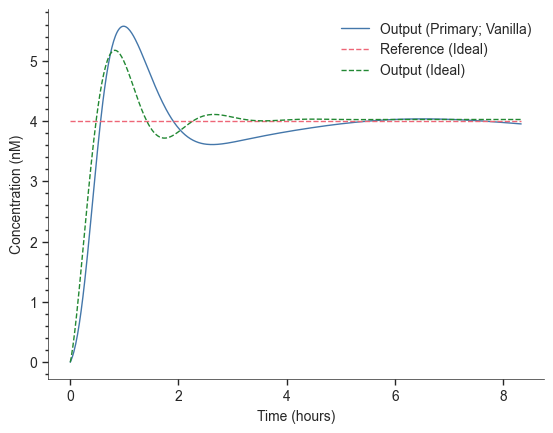

In [217]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky_shadow', 
               x='time', 
               ys={
                   'Yp': ['Yp'],
                   'Ideal_Rp': ['Ideal_Rp'],
                   'Ideal_Yp': ['Ideal_Yp']
               },
               labels=['Output (Primary; Vanilla)', 'Reference (Ideal)', 'Output (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
#                markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'leaky_cancel')

['time', 'X2', 'O2', 'R_NUM_Helper_1', 'R_NUM_Helper_2', 'R_NUM_React']


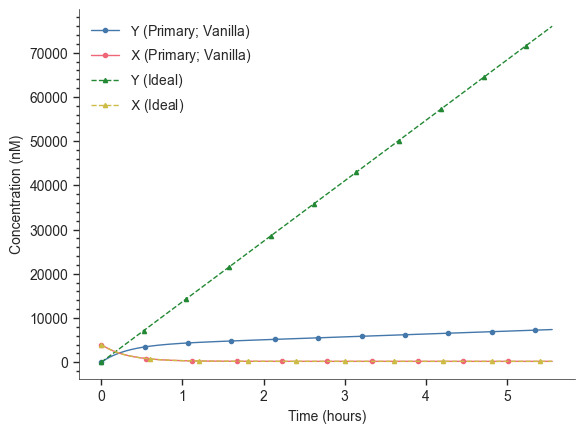

In [218]:
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r8_prod', 
               x='time', 
               ys={
                   'X2': ['X2'],
                   'X1': ['X1'],
                   'O2': ['O2'],
                   'O1': ['O1'],
               },
               labels=['$\mathrm{Y}$ (Primary; Vanilla)', '$\mathrm{X}$ (Primary; Vanilla)', '$\mathrm{Y}$ (Ideal)', '$\mathrm{X}$ (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
                markers=[MARKERS[0]]*2 + [MARKERS[1]]*2,
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

plot_savefig(CONTROL_IMAGES_DIR, 'r8_prod')

['time', 'X1', 'O1']


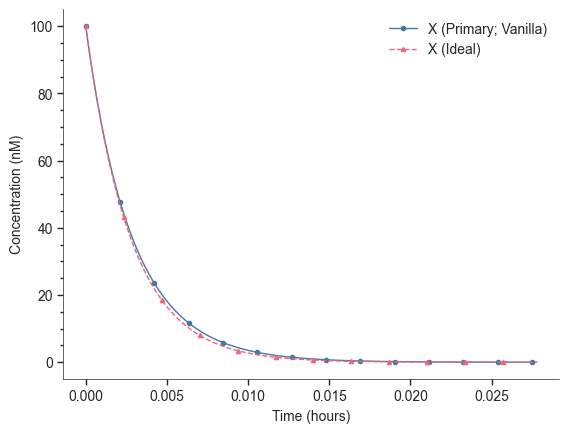

In [219]:
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r9_cons', 
               x='time', 
               ys={
                   'X1': ['X1'],
                   'O1': ['O1']
               },
               labels=['X (Primary; Vanilla)', 'X (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               markers=MARKERS[:2],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'r9_cons')

['time', 'X1', 'X2', 'O1', 'O2']


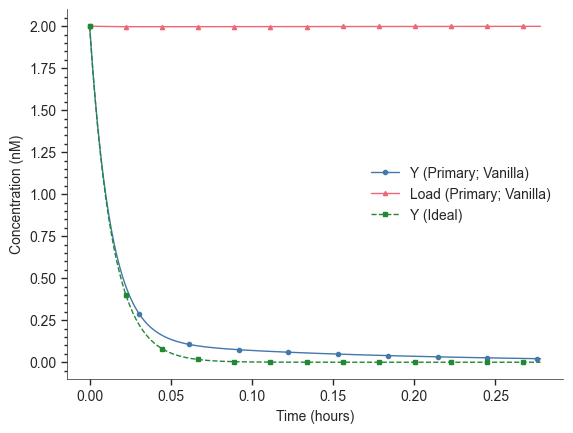

In [220]:

df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r10_load', 
               x='time', 
               ys={
                   'X1': ['X1'],
                   'X2': ['X2'],
                   'O1': ['O1']
               },
               labels=['Y (Primary; Vanilla)', 'Load (Primary; Vanilla)', 'Y (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed'],
               markers=MARKERS[:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CONTROL_IMAGES_DIR, 'r10_load')

# Leak Perturbation

In [221]:
FOLDER='biamp_leak_pert'
SUBFOLDER='leak_pert'
BIAMP_LEAK_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'
if not os.path.exists(BIAMP_LEAK_IMAGES_DIR):
    os.makedirs(BIAMP_LEAK_IMAGES_DIR)
    
kwargs = {
    'markersize': 3, 
    'markevery': 60,
    'linewidth': 1
}
    

In [222]:
print(MARKERS)

['o', '^', 's', 'P', '<', 'x', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v']


In [223]:

for index, LEAK in enumerate([0, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{LEAK}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'C': ['Cj', 'Ck'],
                   },
                   labels=[f'C ($\Delta$ Leak = {LEAK}%)', f'shC @ Leak={1 + LEAK/100}e-8 /nM/s', f'Cancel @ Leak={LEAK}e-9 /nM/s',],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   markers=[MARKERS[index]],
                   colors=[MCOLORS[index]],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
plot_savefig(BIAMP_LEAK_IMAGES_DIR, f'biamp_leak_pert')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_leak_pert/leak_pert/0/plots/orig_shadow_cancel'

In [ ]:
legendkwargs = {
    'ncols': 2,
    'loc': 'best',
    'fontsize': 'small'
}
for index, LEAK in enumerate([0, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{LEAK}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk'], 
                   },
                   labels=[f'shC ($\Delta$ Leak = {LEAK}%)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   markers=[MARKERS[index]],
                   colors=[MCOLORS[index]],
                   legendkwargs=legendkwargs,
                   **kwargs)
plot_savefig(BIAMP_LEAK_IMAGES_DIR, f'biamp_leakactivity_leak_pert')

In [ ]:
for index, LEAK in enumerate([0, 100, 200, 300, 400, 500, 600, 700]):
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{LEAK}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
#                        'C': ['Cj'],
#                        'shC': ['shCj', 'shCk'], 
                        'Cancel': ['CancelC']
                   },
                   labels=[f'Cancel ($\Delta$ Leak = {LEAK}%)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   markers=[MARKERS[index]],
                   colors=[MCOLORS[index]],
                   **kwargs)
plot_savefig(BIAMP_LEAK_IMAGES_DIR, f'biamp_cancel_leak_pert')

### RPS LEAK PERT

In [ ]:
FOLDER='rps_v2_pert_leak'
SUBFOLDER='pert_leak'
RPS_PERT_LEAK_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'

if not os.path.exists(RPS_PERT_LEAK_IMAGES_DIR):
    os.makedirs(RPS_PERT_LEAK_IMAGES_DIR)

kwargs = {
    'markersize': 3, 
    'markevery': 60,
    'linewidth': 1
}

In [ ]:
folders = [0, 100, 200, 300, 400, 500, 600, 700]

for folder in folders:    
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{folder}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'A': ['Ap', 'Aq'],
                       'B': ['Br', 'Bs'],
                       'C': ['Cj', 'Ck'],
                   },
                   labels=[f'A ($\Delta$ Leak = {folder}%)', f'B ($\Delta$ Leak = {folder}%)', f'C ($\Delta$ Leak = {folder}%)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid'],
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    
    plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, f'rps_pert_leak_{folder}')
    plt.clf()

In [ ]:
from IPython.display import Image
img = Image(filename=os.path.join(RPS_PERT_LEAK_IMAGES_DIR, f'rps_pert_leak_200.png')) 
display(img)

In [ ]:
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/100/plots/orig_shadow_cancel', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                },
#                labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name='rps_original_shadow_cancel_pert_leak-1',
#                **kwargs)
# plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_1')

In [ ]:
# kwargs = {
# }
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/200/plots/orig_shadow_cancel', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                },
#                labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name='rps_original_shadow_cancel_pert_leak-200',
#                **kwargs)
# plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_5')

In [ ]:
# kwargs = {
# }
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/300/plots/orig_shadow_cancel', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                },
#                labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name='rps_original_shadow_cancel_pert_leak-200',
#                **kwargs)
# plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_5')

In [ ]:
# kwargs = {
# }
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/400/plots/orig_shadow_cancel', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                },
#                labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name='rps_original_shadow_cancel_pert_leak-200',
#                **kwargs)
# plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_5')

In [ ]:
# kwargs = {
# }
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/500/plots/orig_shadow_cancel', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                },
#                labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name='rps_original_shadow_cancel_pert_leak-10',
#                **kwargs)
# plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_10')

In [ ]:
# kwargs = {
# }
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/600/plots/orig_shadow_cancel', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                },
#                labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name='rps_original_shadow_cancel_pert_leak-20',
#                **kwargs)
# plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_20')

In [ ]:
# kwargs = {
# }
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/700/plots/orig_shadow_cancel', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                },
#                labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name='rps_original_shadow_cancel_pert_leak-50',
#                **kwargs)
# plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_50')

In [ ]:
# perts = ['0', '1', '5', '10', '20', '50', '100']
# labels = [f'{1 + int(pert)/100}X' for pert in perts]
# dfs_nocancel = []
# for index, pert in enumerate(perts):
#     df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
#                    x='time', 
#                    ys={
#                        'shA': ['shAp', 'shAq']
#                    },
#                    labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
#                    xlabel='Time (hours)',
#                    ylabel='Concentration (nM)',
#                    linestyles=['solid'],
#                    markers=[MARKERS[index]],
#                    colors=[MCOLORS[index]],
#                    name='rps_orig_shadow_nocancel',
#                    text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                    **kwargs)
#     dfs_nocancel.append(df)
# plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_nocancel_combined')

In [ ]:
# perts = ['0', '20', '50', '100']
# labels = [f'{1 + int(pert)/100}X' for pert in perts]
# dfs_nocancel = []
# for index, pert in enumerate(perts):
#     df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
#                    x='time', 
#                    ys={
#                        'shA': ['shAp', 'shAq']
#                    },
#                    labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
#                    xlabel='Time (hours)',
#                    ylabel='Concentration (nM)',
#                    linestyles=['solid'],
#                    markers=[MARKERS[index]],
#                    colors=[MCOLORS[index]],
#                    name='rps_orig_shadow_cancel',
#                    text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                    **kwargs)
#     dfs_nocancel.append(df)
#     plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_cancel_combined')

###  At a particular perturbation plot all the three species

In [ ]:
# tableau_colors=list(mcolors.TABLEAU_COLORS)
# perts = ['50']
# labels = ['1.5X']
# legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

# X = 'time'
# Ys = {
#         'shA': ['shAp', 'shAq']
#      }

# for index, pert in enumerate(perts):
#     kwargs = {
#     }
#     df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
#                    x='time', 
#                    ys=Ys,
#                    labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
#                    xlabel='Time (hours)',
#                    ylabel='Concentration (nM)',
#                    linestyles=['dashed' for y in Ys],
#                    colors=tableau_colors[index:index+len(Ys)],
#                    name=f'rps_orig_shadow_pert_nocancel_{labels[index]}',
#                    text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                    legendkwargs=legendkwargs,
#                    **kwargs)

# for index, pert in enumerate(perts):
#     kwargs = {
#     }
#     df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
#                    x='time', 
#                    ys={
#                        'shA': ['shAp', 'shAq']
#                    },
#                    labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
#                    xlabel='Time (hours)',
#                    ylabel='Concentration (nM)',
#                    linestyles=['solid'],
#                    colors=[tableau_colors[index]],
#                    name='rps_orig_shadow_pert_cancel_{labels[index]}',
#                    text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                    **kwargs)
# plot_savefig(RPS_PERT_LEAK_IMAGES_DIR, 'rps_leak_pert_cancel_nocancel_50')

## RPS ACCELERATE

We accelerate the BIAMP reaction by increasing the concentration of the fuel species and Buffering the cancellation complexes to maintain the maximum

In [ ]:
# FOLDER = 'rps_v2_speed'
# SUBFOLDER = 'leaky_shadow'
# RPS_SPEED_IMAGES_DIR = f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images/'
# if not os.path.exists(RPS_SPEED_IMAGES_DIR):
#     os.makedirs(RPS_SPEED_IMAGES_DIR)

In [ ]:
# kwargs = {
# }
# ACCEL = '1X'
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                    'shA': ['shAp', 'shAq'],
#                    'shB': ['shBr', 'shBs'],
#                    'shC': ['shCj', 'shCk']
#                },
#                labels=['A (Primary)', 'B (Primary)', 'C (Primary)', 'A (Shadow)', 'B (Shadow)', 'C (Shadow)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid', 'dashdot', 'dashdot', 'dashdot'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name=f'rps_speed_accel_{ACCEL}',
#                **kwargs)
# plot_savefig(RPS_SPEED_IMAGES_DIR, f'leaky_shadow_accel_{ACCEL}')

In [ ]:
# kwargs = {
# }
# ACCEL = '2X'
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_accel_{ACCEL}', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                    'shA': ['shAp', 'shAq'],
#                    'shB': ['shBr', 'shBs'],
#                    'shC': ['shCj', 'shCk']
#                },
#                labels=['A (Primary)', 'B (Primary)', 'C (Primary)', 'A (Shadow)', 'B (Shadow)', 'C (Shadow)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid', 'dashdot', 'dashdot', 'dashdot'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name=f'rps_speed_accel_{ACCEL}',
#                **kwargs)
# plot_savefig(RPS_SPEED_IMAGES_DIR, f'leaky_shadow_accel_{ACCEL}')

In [ ]:
# kwargs = {
# }
# ACCEL = '3X'
# df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_accel_{ACCEL}', 
#                x='time', 
#                ys={
#                    'A': ['Ap', 'Aq'],
#                    'B': ['Br', 'Bs'],
#                    'C': ['Cj', 'Ck'],
#                    'shA': ['shAp', 'shAq'],
#                    'shB': ['shBr', 'shBs'],
#                    'shC': ['shCj', 'shCk']
#                },
#                labels=['A (Primary)', 'B (Primary)', 'C (Primary)', 'A (Shadow)', 'B (Shadow)', 'C (Shadow)'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'solid', 'solid', 'dashdot', 'dashdot', 'dashdot'],
#                text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                name=f'rps_speed_accel_{ACCEL}',
#                **kwargs)
# plot_savefig(RPS_SPEED_IMAGES_DIR, f'leaky_shadow_accel_{ACCEL}')

# RPS

In [331]:
REG_FOLDER='rps_v2'
RPS_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/images/'
if not os.path.exists(RPS_IMAGES_DIR):
    os.mkdir(RPS_IMAGES_DIR)

In [ ]:
kwargs = {
    'markersize': 3, 
    'markevery': 50,
    'linewidth': 1
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/ideal', 
               x='time', 
               ys={
                   'A': ['A'],
                   'B': ['B'],
                   'C': ['C'],
               },
               labels=['A (Ideal)', 'B (Ideal)', 'C (Ideal)'],
               xlabel='',
               ylabel='',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plt.legend().set_visible(False)
plt.xticks([])
plt.yticks([])
plot_savefig(RPS_IMAGES_DIR, 'ideal')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'HelperCCk', 'HelperAAq']


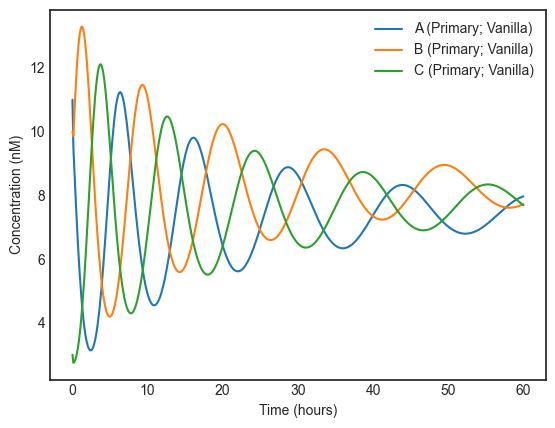

In [321]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary; Vanilla)', 'B (Primary; Vanilla)', 'C (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                colors=COLORS['primary'][:3],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'HelperCCk', 'HelperAAq']


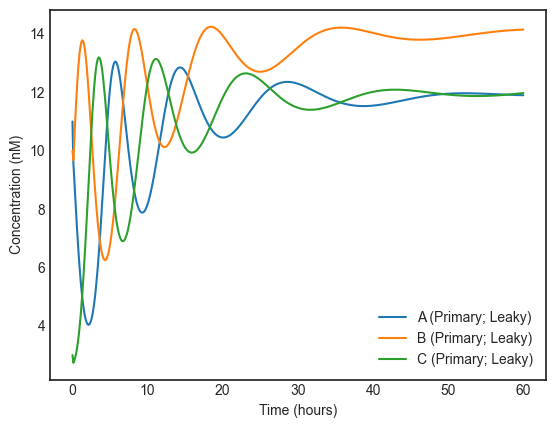

In [322]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary; Leaky)', 'B (Primary; Leaky)', 'C (Primary; Leaky)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                colors=COLORS['primary'][:3],
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'HelperCCk', 'HelperAAq']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'HelperCCk', 'HelperAAq']


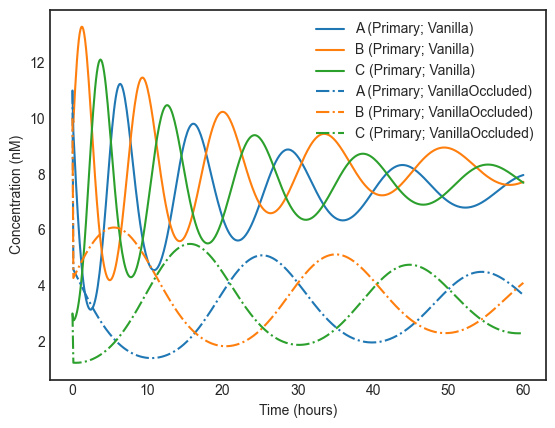

In [323]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary; Vanilla)', 'B (Primary; Vanilla)', 'C (Primary; Vanilla)'],
#                 labels=['B (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                colors=COLORS['primary'][:3],
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary; VanillaOccluded)', 'B (Primary; VanillaOccluded)', 'C (Primary; VanillaOccluded)'],
#                labels=['B (Primary; VanillaOccluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashdot', 'dashdot', 'dashdot'],
#                colors=COLORS['primary_occluded'][:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'occluded')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


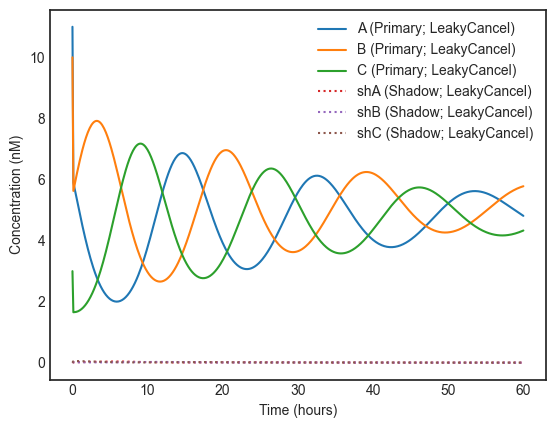

In [324]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'], 
               },
               labels=['A (Primary; LeakyCancel)', 'B (Primary; LeakyCancel)', 'C (Primary; LeakyCancel)', 'shA (Shadow; LeakyCancel)', 'shB (Shadow; LeakyCancel)', 'shC (Shadow; LeakyCancel)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
#                colors=COLORS['primary'][:3] + COLORS['shadow'][:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(RPS_IMAGES_DIR, 'leaky_shadow')

In [325]:
REG_FOLDER='rps_v2_nobuffer'
RPS_NOBUF_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/images'
if not os.path.exists(RPS_NOBUF_IMAGES_DIR):
    os.mkdir(RPS_NOBUF_IMAGES_DIR)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


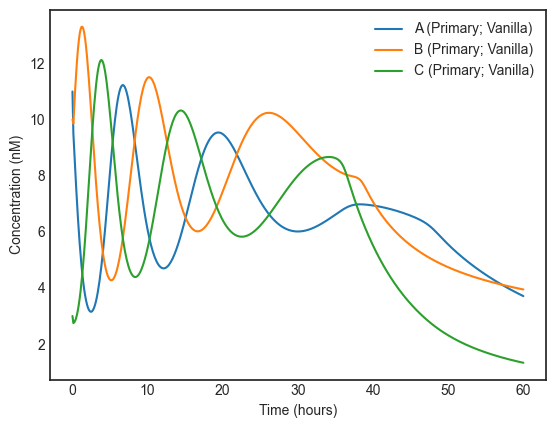

In [326]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary; Vanilla)', 'B (Primary; Vanilla)', 'C (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                 colors=COLORS['primary'][:3],
               **kwargs)
plot_savefig(RPS_NOBUF_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


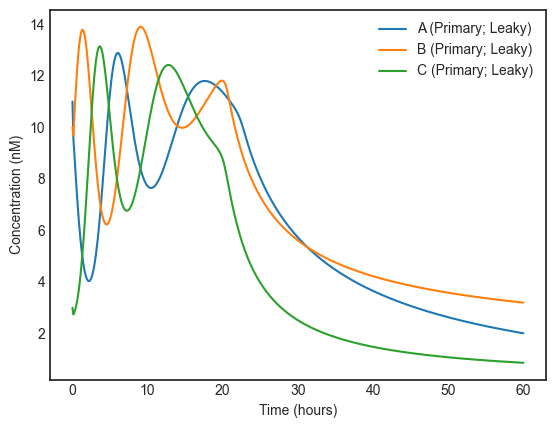

In [327]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary; Leaky)', 'B (Primary; Leaky)', 'C (Primary; Leaky)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#             colors=COLORS['primary'][:3],
               **kwargs)
plot_savefig(RPS_NOBUF_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


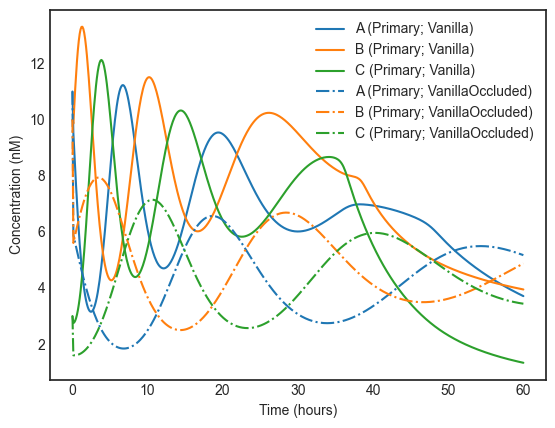

In [328]:
kwargs = {
}

df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary; Vanilla)', 'B (Primary; Vanilla)', 'C (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
#                 colors=COLORS['primary'][:3],
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (Primary; VanillaOccluded)', 'B (Primary; VanillaOccluded)', 'C (Primary; VanillaOccluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashdot', 'dashdot', 'dashdot'],
#                 colors=COLORS['primary_occluded'][:3],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(RPS_NOBUF_IMAGES_DIR, 'occluded')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']


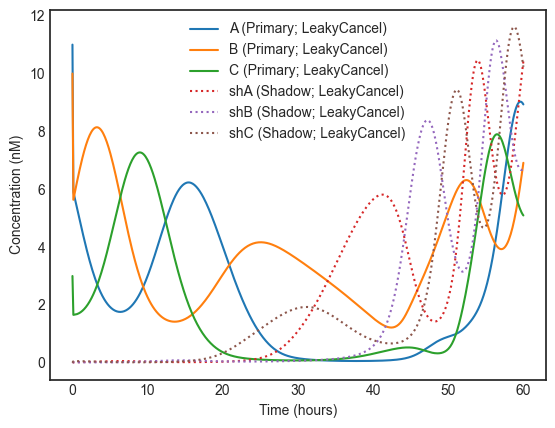

In [329]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{REG_FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shC': ['shCj', 'shCk'],  
               },
               labels=['A (Primary; LeakyCancel)', 'B (Primary; LeakyCancel)', 'C (Primary; LeakyCancel)', 'shA (Shadow; LeakyCancel)', 'shB (Shadow; LeakyCancel)', 'shC (Shadow; LeakyCancel)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(RPS_NOBUF_IMAGES_DIR, 'leaky_shadow')

# RPS Srinivas et al. 

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck']


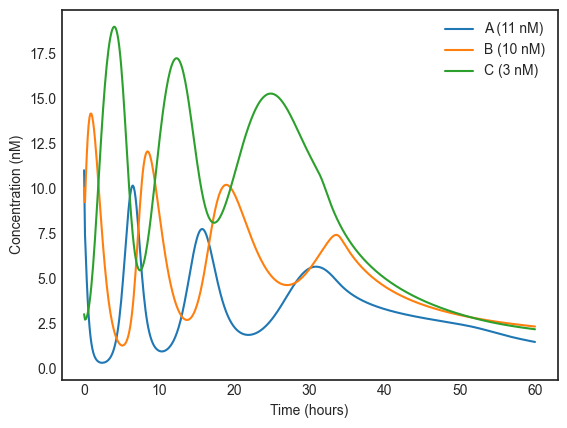

In [315]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_srini/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'HelperAAq', 'HelperBBs', 'HelperCCk']


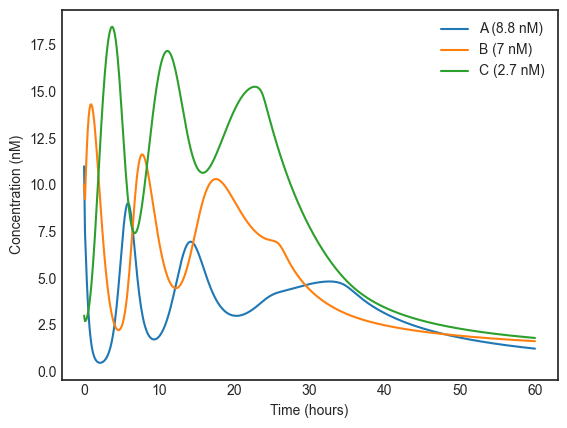

In [277]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_srini/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (8.8 nM)', 'B (7 nM)', 'C (2.7 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# RPS V2

## Toehold Occlusion

In [26]:
FOLDER='rps_v2'
SUBFOLDER = 'leaky_shadow_toeocc'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_60_nM.png


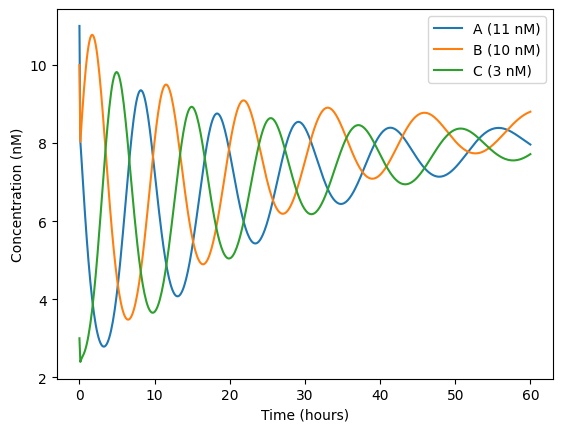

In [23]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_60_nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_60_nM',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_300_nM.png


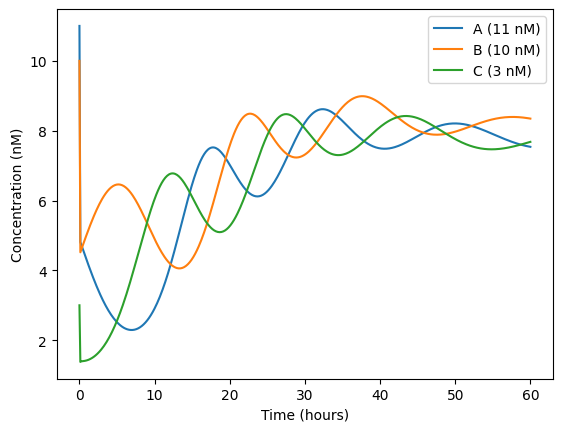

In [24]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_300_nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_300_nM',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_600_nM.png


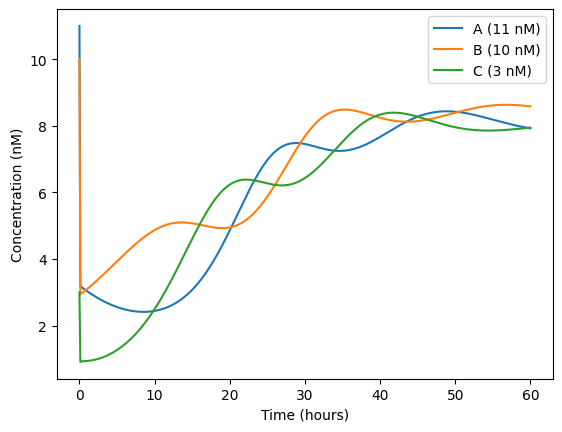

In [25]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_600_nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_600_nM',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2/leaky_shadow_toeocc/plots/leaky_shadow_toeocc_1000_nM.png


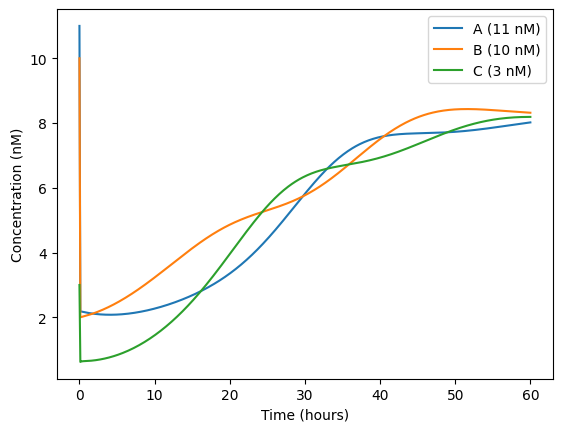

In [26]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/plots/leaky_shadow_toeocc_1000_nM', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='leaky_shadow_toeocc_1000_nM',
               **kwargs)

# Consensus

In [350]:
FOLDER='con_v3'
CON_IMAGES_DIR=f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/images'
if not os.path.exists(CON_IMAGES_DIR):
    os.mkdir(CON_IMAGES_DIR)

['time', 'OA', 'OB', 'OY']


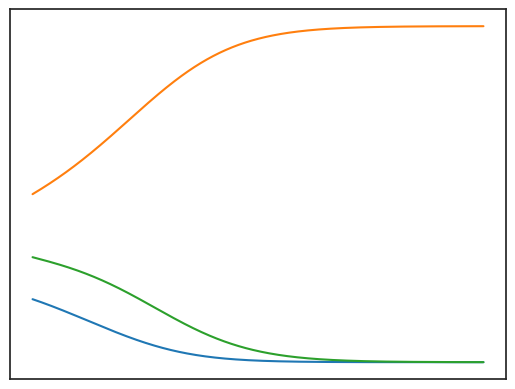

In [351]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/ideal', 
               x='time', 
               ys={
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=['A (ideal)', 'B (ideal)', 'Y (ideal)'],
               xlabel='',
               ylabel='',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plt.legend().set_visible(False)
plt.xticks([])
plt.yticks([])
plot_savefig(CON_IMAGES_DIR, 'ideal')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']


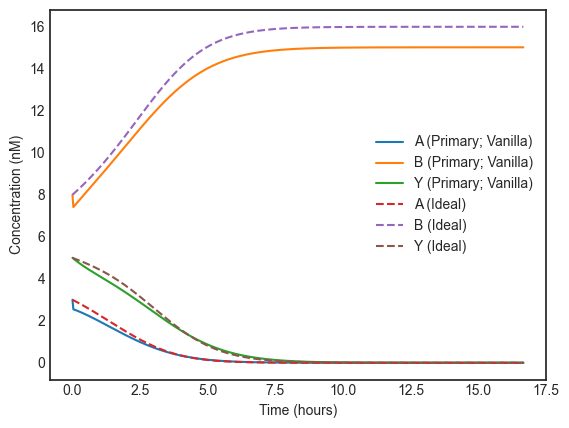

In [373]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=['A (Primary; Vanilla)', 'B (Primary; Vanilla)', 'Y (Primary; Vanilla)', 'A (Ideal)', 'B (Ideal)', 'Y (Ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'original')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']


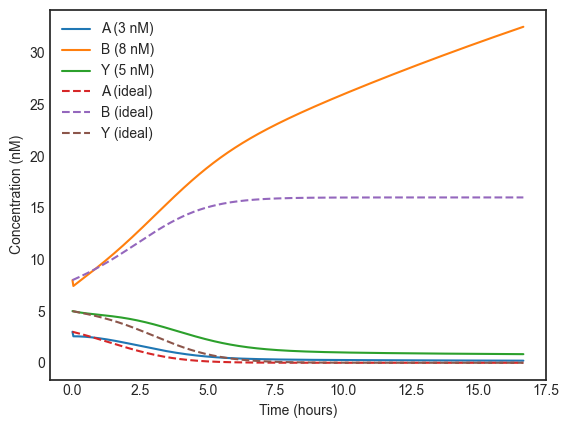

In [374]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
                   'OA': ['OA'],
                   'OB': ['OB'],
                   'OY': ['OY']
               },
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'A (ideal)', 'B (ideal)', 'Y (ideal)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'leaky')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'shAp', 'shAq', 'shBr', 'shBs', 'shYi', 'shYj']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj']


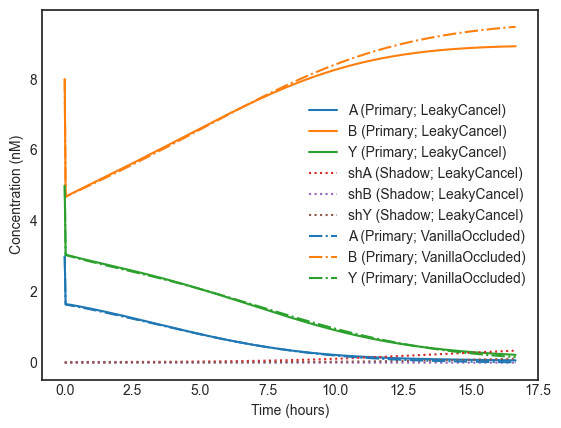

In [378]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
                   'shA': ['shAp', 'shAq'],
                   'shB': ['shBr', 'shBs'],
                   'shY': ['shYi', 'shYj'],
               },
               labels=['A (Primary; LeakyCancel)', 'B (Primary; LeakyCancel)', 'Y (Primary; LeakyCancel)', 'shA (Shadow; LeakyCancel)', 'shB (Shadow; LeakyCancel)', 'shY (Shadow; LeakyCancel)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A (Primary; VanillaOccluded)', 'B (Primary; VanillaOccluded)', 'Y (Primary; VanillaOccluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashdot', 'dashdot', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'leaky_shadow')

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj', 'OA', 'OB', 'OY']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Yi', 'Yj']


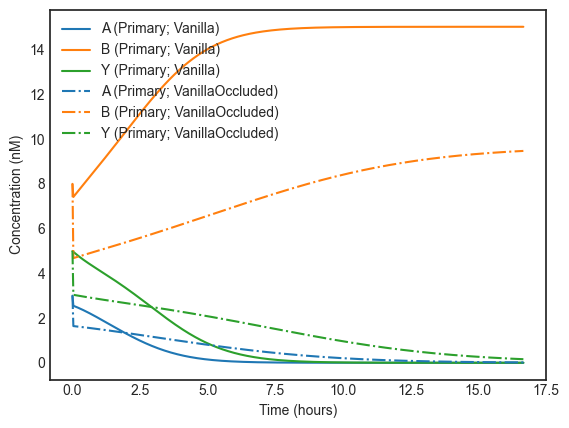

In [379]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A (Primary; Vanilla)', 'B (Primary; Vanilla)', 'Y (Primary; Vanilla)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/occluded/plots/occluded', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'Y': ['Yi', 'Yj'],
               },
               labels=['A (Primary; VanillaOccluded)', 'B (Primary; VanillaOccluded)', 'Y (Primary; VanillaOccluded)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashdot', 'dashdot', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)
plot_savefig(CON_IMAGES_DIR, 'occluded')

# Perturbation

In [8]:
FOLDER='rps_v2_pert'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_original_shadow_pert-1X_cancel.png


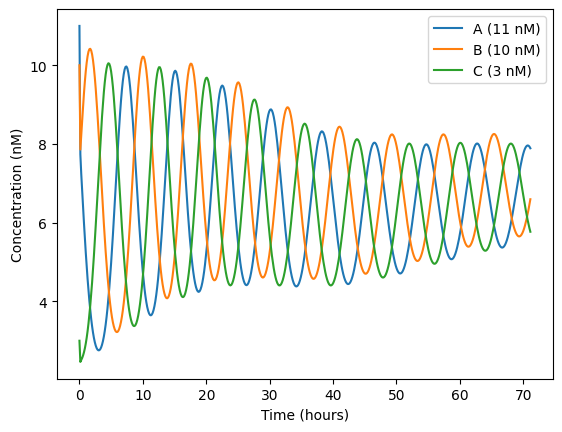

In [233]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-1X_cancel',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_original_shadow_pert-1.5X_cancel.png


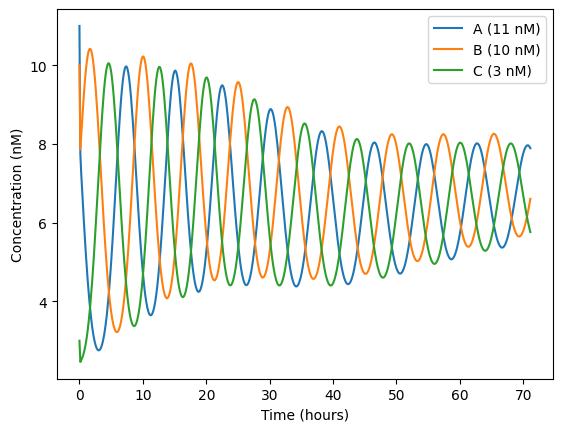

In [234]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_original_shadow_pert-2X_cancel.png


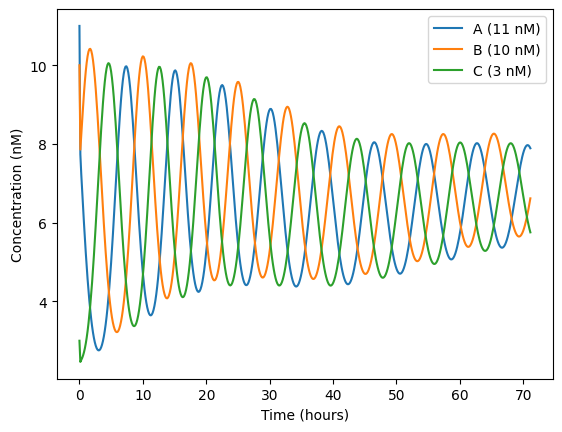

In [235]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_original_shadow_pert-5X_cancel.png


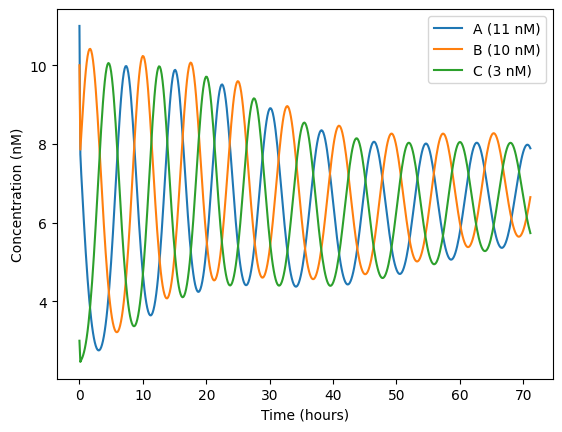

In [236]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/9/plots/rps_original_shadow_pert-10X_cancel.png


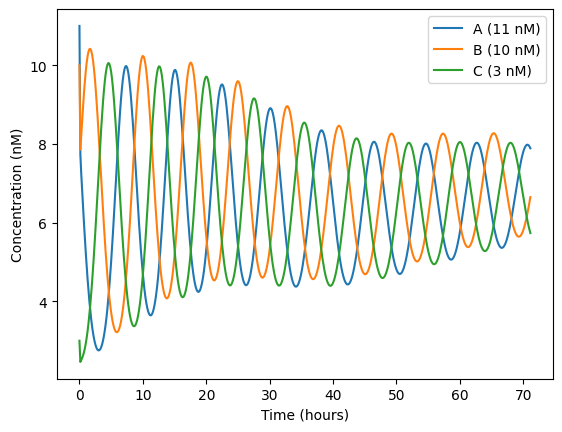

In [237]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-10X_cancel',
               **kwargs)

# Leaks under Perturbation and Shadow Cancellation

Here, we measure the leak in different cases of Perturbation with and without shadow cancellation. This shows that while in the absence of shadow cancellation the leak is amplified exponentially, in the presence of shadow cancellation, the leak is amplified subexponentially. This can be captured by the behavior of the shadow signal strands. 

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_nocancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_orig_shadow_pert_nocancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_nocancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/toward

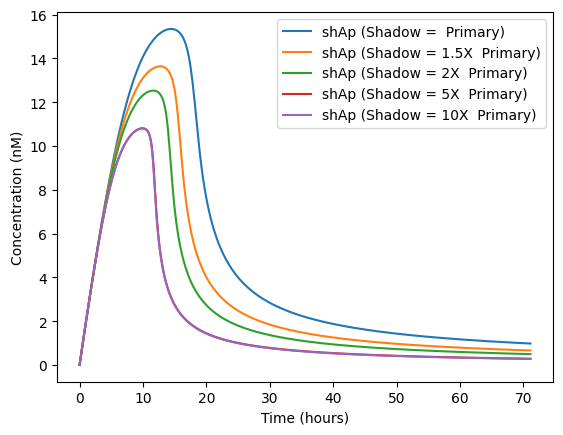

In [238]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shAp (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_nocancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_cancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_orig_shadow_pert_cancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_cancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_cancel_zeroconc.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyt

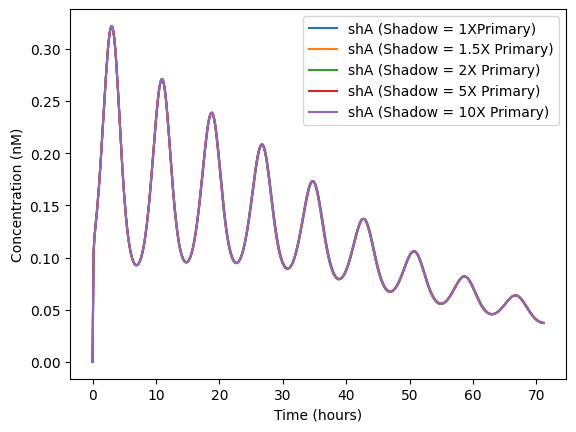

In [239]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = [ '1X', '1.5X ', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shA (Shadow = {labels[index]}Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'rps_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_0/plots/rps_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/0_5/plots/rps_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/4/plots/rps_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Us

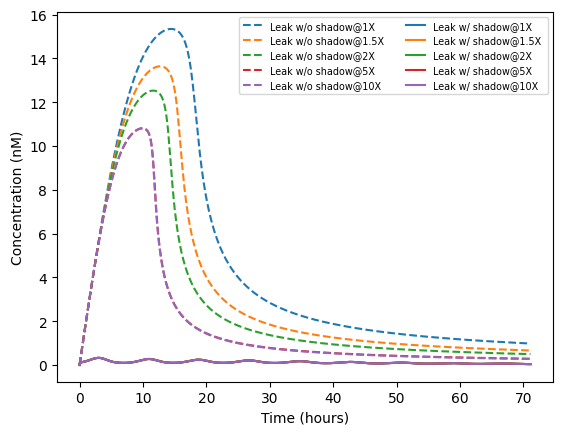

In [240]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak w/o shadow@{labels[index]}'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak w/ shadow@{labels[index]}'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_nocancel_2X.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_cancel_2X.png


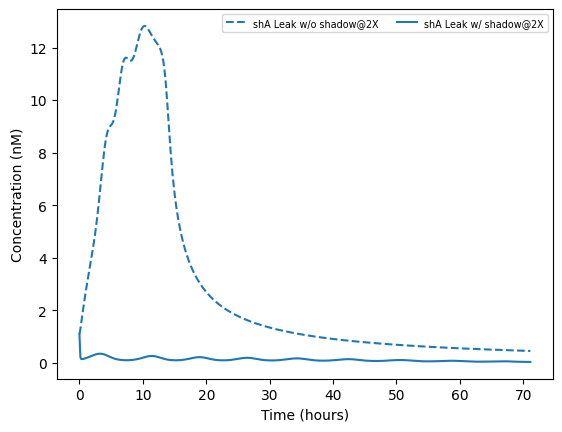

In [241]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shA': ['shAp', 'shAq']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert/1/plots/rps_orig_shadow_pert_cancel_2X_withprimary.png


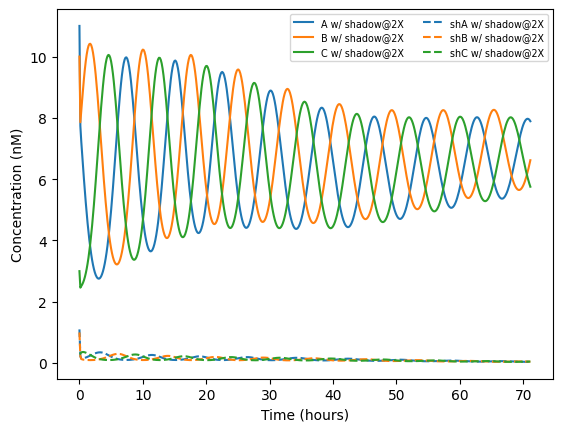

In [242]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'

Ys = {
        'A': ['Ap', 'Aq'],
        'B': ['Br', 'Bs'],
        'C': ['Cj', 'Ck'],
        'shA': ['shAp', 'shAq'],
        'shB': ['shBr', 'shBs'],
        'shC': ['shCj', 'shCk']
     }
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

## BIAMP Perturbation Experimentsy

In [ ]:
FOLDER = 'biamp'

['time', 'Cj', 'Ck', 'Br', 'O1', 'O2']


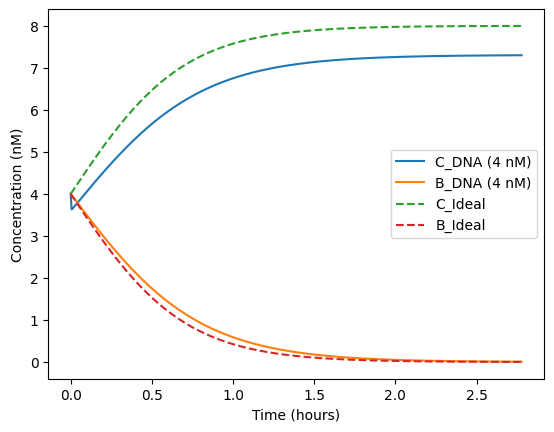

In [32]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/original/plots/main_max', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


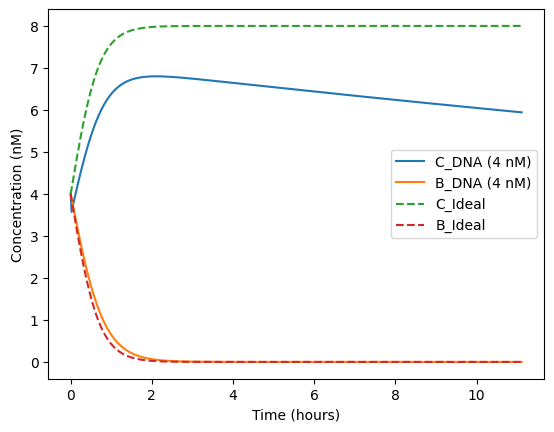

In [36]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


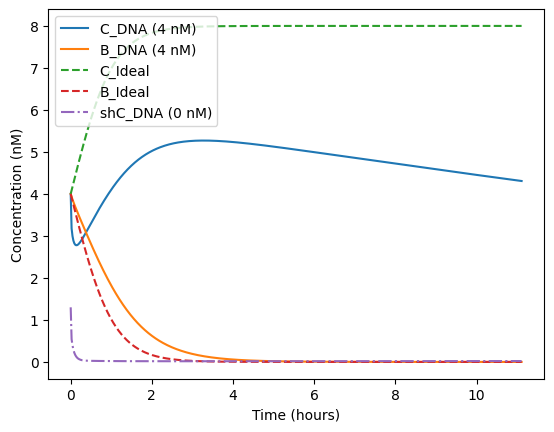

In [37]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2'], 
                   'shC': ['shCj', 'shCk']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal', 'shC_DNA (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed', 'dashdot'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


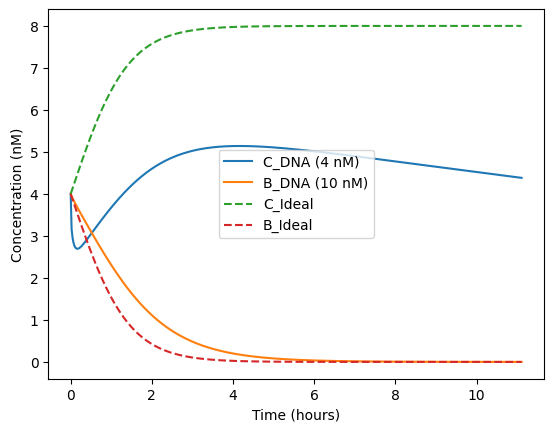

In [39]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


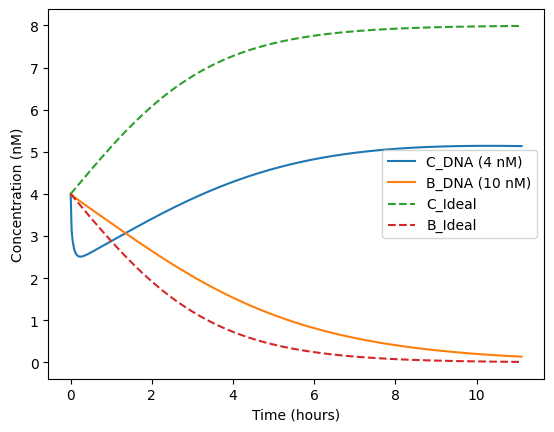

In [40]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


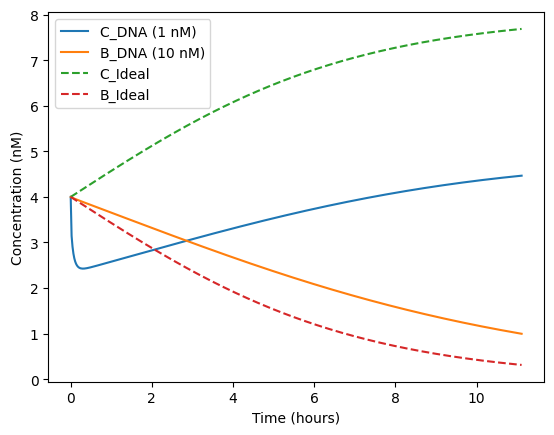

In [41]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj', 'Ck'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (10 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-10X_cancel',
               **kwargs)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


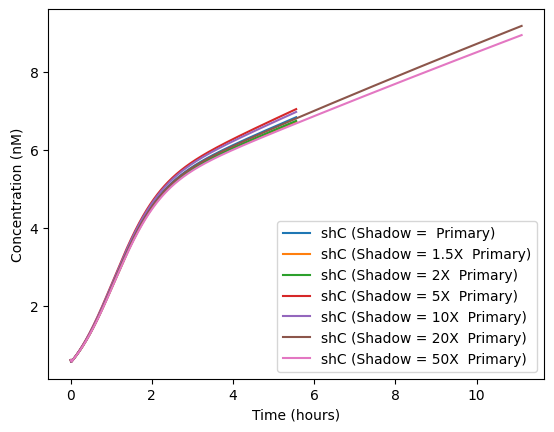

In [92]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9', '19', '49']
labels = ['', '1.5X ', '2X ', '5X ', '10X ', '20X ', '50X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


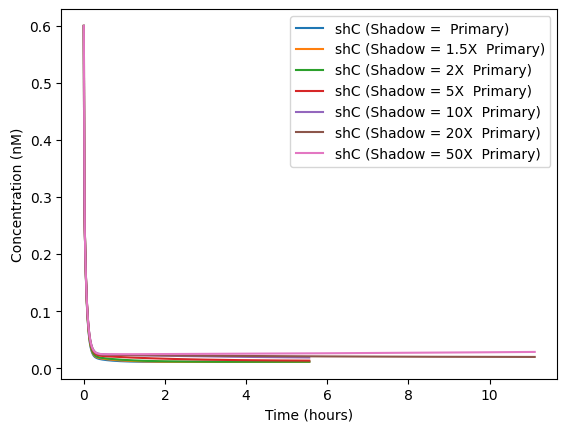

In [93]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9', '19', '49']
labels = ['', '1.5X ', '2X ', '5X ', '10X ', '20X ', '50X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


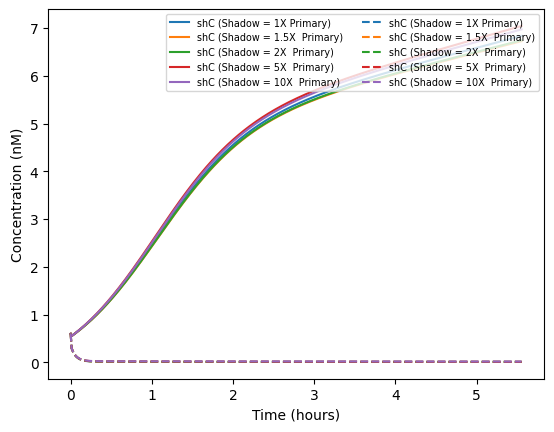

In [86]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCk']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']
['time', 'Cj', 'Ck', 'Br', 'shCj', 'shCk', 'shBr', 'O1', 'O2']


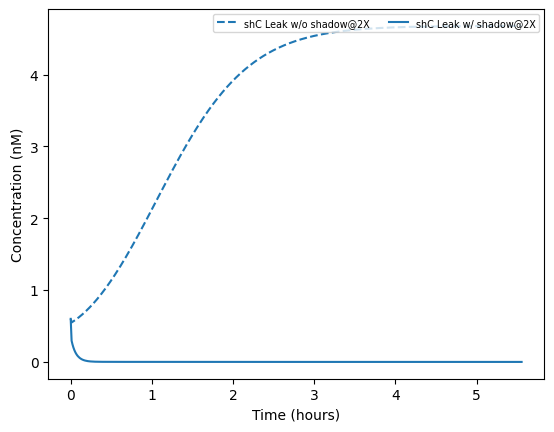

In [87]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shC': ['shCj', 'shCj']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

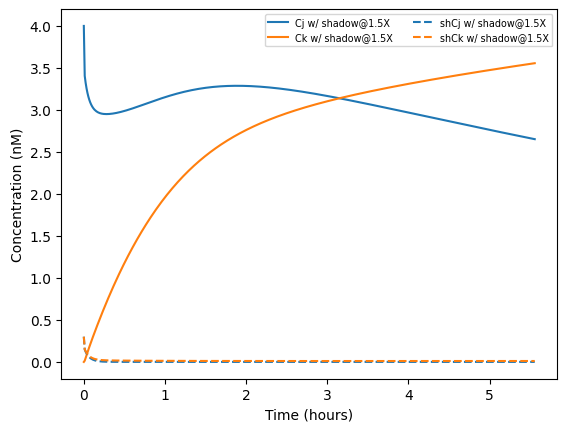

In [88]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_5']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = [ 'Cj', 'Ck', 'shCj', 'shCk']
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys[:2]] + ['dashed' for y in Ys[2:]], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

### BIAMP COMPRESSED

In [172]:
FOLDER = 'biamp_compress'

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_0/plots/biamp_original_shadow_pert-1X_cancel.png


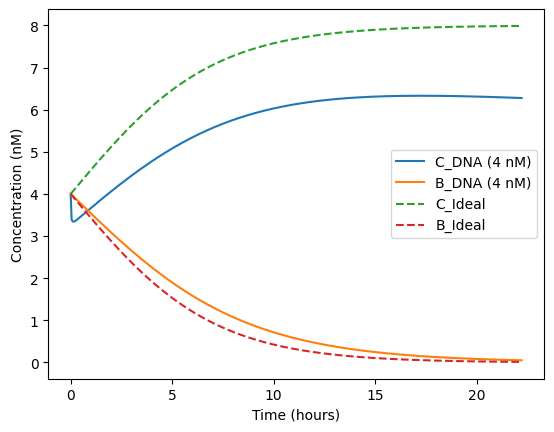

In [173]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_0/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_original_shadow_pert-1.5X_cancel.png


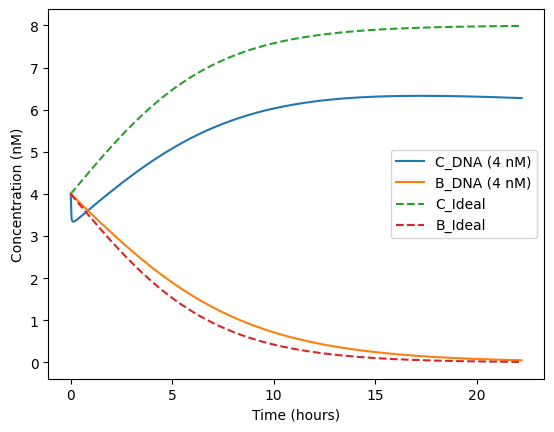

In [174]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_original_shadow_pert-2X_cancel.png


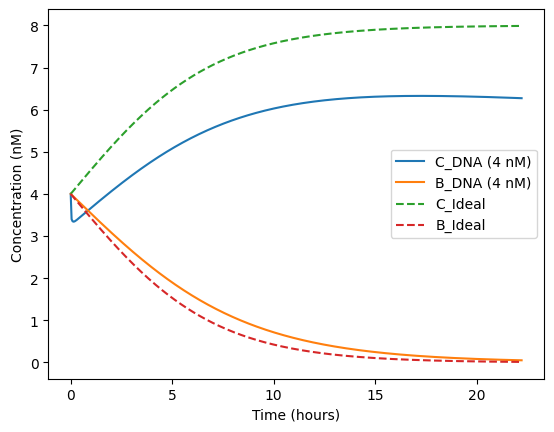

In [175]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/1/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/4/plots/biamp_original_shadow_pert-5X_cancel.png


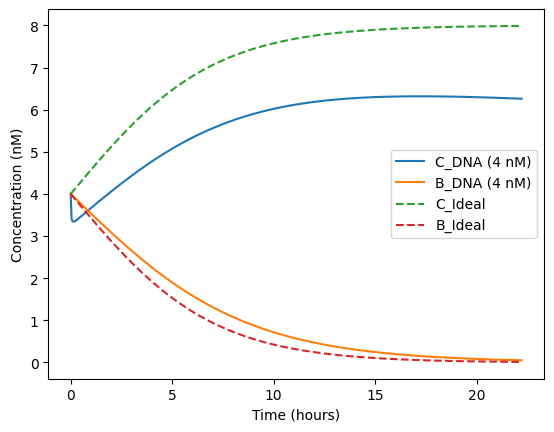

In [176]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/9/plots/biamp_original_shadow_pert-10X_cancel.png


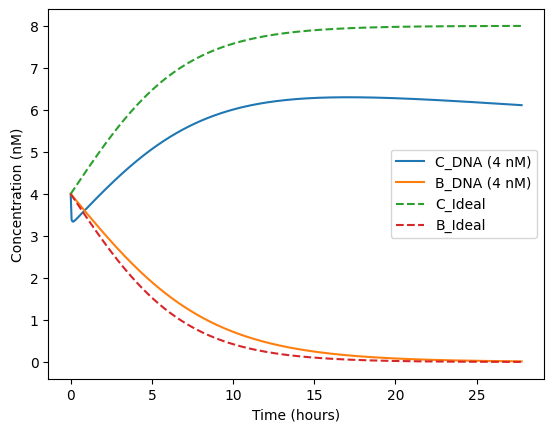

In [177]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/9/plots/orig_shadow_pert_cancel', 
                x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (4 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal' ],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_pert-10X_cancel',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_0/plots/biamp_orig_shadow_pert_nocancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_orig_shadow_pert_nocancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_nocancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/4/plots/biamp_orig_shadow_pert_nocancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/9/plots/biamp_orig_shadow_pert_nocancel.png


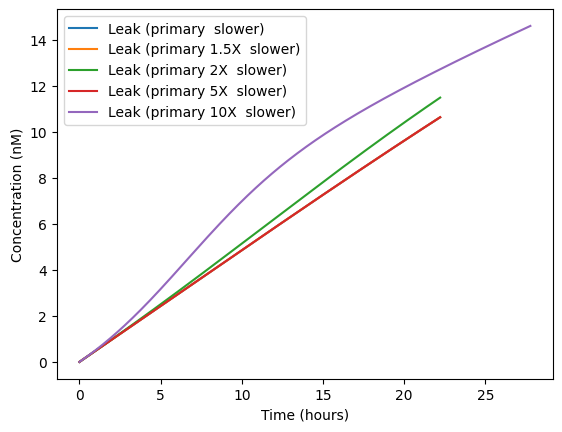

In [185]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj'] # Note that even signal are set to zero in zeroconc.
                   },
                   labels=[f'Leak (primary {labels[index]} slower)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_0/plots/biamp_orig_shadow_pert_cancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_orig_shadow_pert_cancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_cancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/4/plots/biamp_orig_shadow_pert_cancel.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/9/plots/biamp_orig_shadow_pert_cancel.png


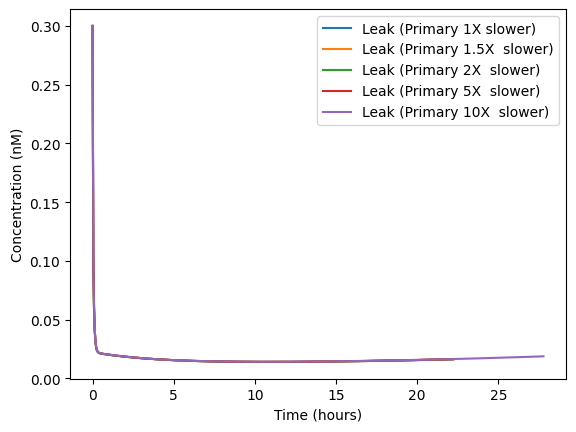

In [186]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = [ '1X', '1.5X ', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'Leak (Primary {labels[index]} slower)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_cancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_0/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/4/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/9/plots/biamp_orig_shadow_pert_nocancel_cancel_combined.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desk

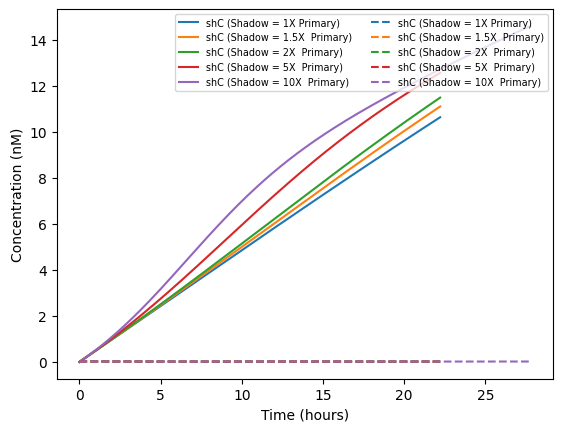

In [187]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_nocancel_2X.png
['time', 'Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/1/plots/biamp_orig_shadow_pert_cancel_2X.png


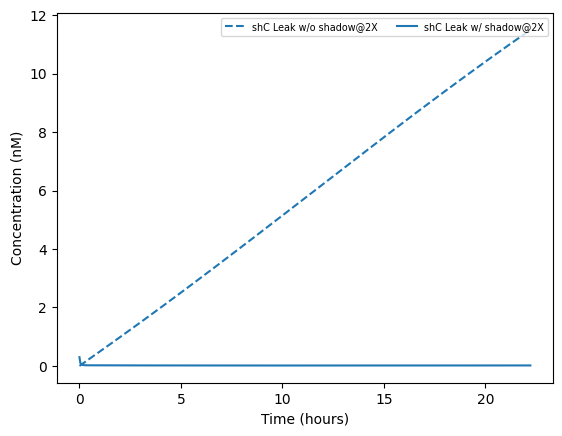

In [188]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shC': ['shCj']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_compress/pert/0_5/plots/biamp_orig_shadow_pert_cancel_1.5X_withprimary.png


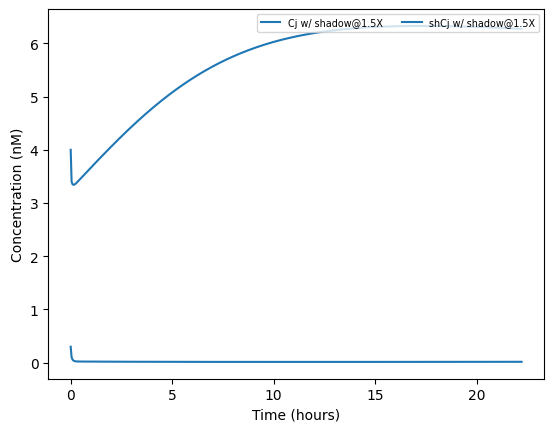

In [183]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_5']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = [ 'Cj', 'shCj']
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/pert/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys[:2]] + ['dashed' for y in Ys[2:]], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'biamp_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


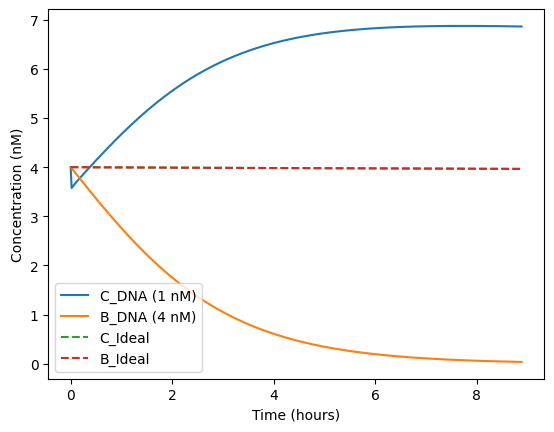

In [393]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_1x', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_1x',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


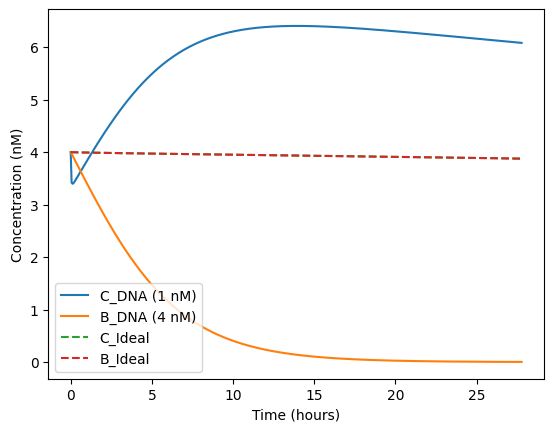

In [392]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_2x_slower', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_2x_slower',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


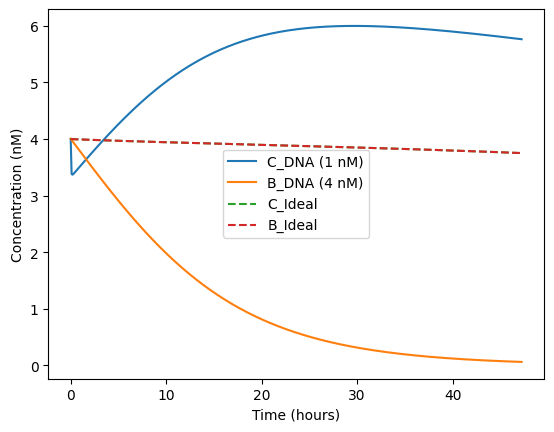

In [396]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_5x_slower', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_5x_slower',
               **kwargs)

['time', 'Cj', 'Br', 'shCj', 'shBr']


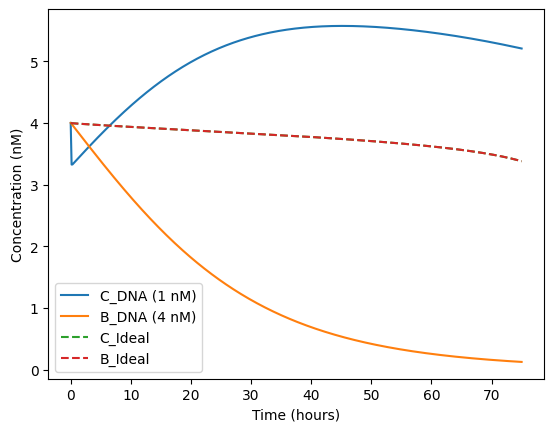

In [395]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/0_0/plots/orig_10x_slower', 
               x='time', 
               ys={
                   'C': ['Cj'],
                   'B': ['Br'],
                   'O1': ['O1'],
                   'O2' : ['O2']
               },
               labels=['C_DNA (1 nM)', 'B_DNA (4 nM)',  'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='orig_10x_slower',
               **kwargs)

# Catalysis, Annihilation, and Degradation

ValueError: 'O1' is neither a data key nor a valid format string (unrecognized character 'O')

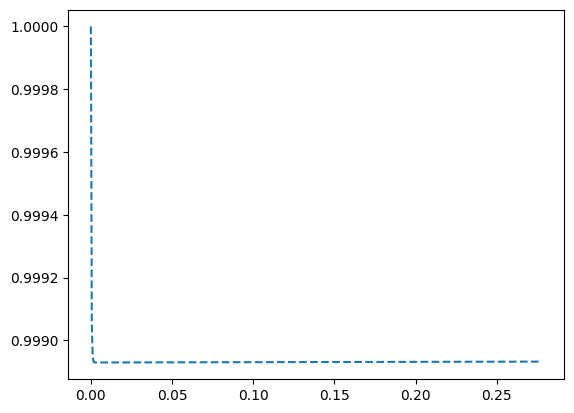

In [389]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r1_cat', 
               x='time', 
               ys=['X1', 'O1', 'X2', 'O2'],
               labels=['X_DNA (1 nM)', 'X_Ideal (1 nM)', 'Y_DNA (0 nM)', 'Y_Ideal (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [ ]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r4_deg', 
               x='time', 
               ys=['X1', 'O1'],
               labels=['Y_Ideal (1 nM)', 'Y_DNA (1 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [ ]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r11_ann', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Xp_DNA', 'Xm_DNA', 'Xp_Ideal', 'Xm_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Control

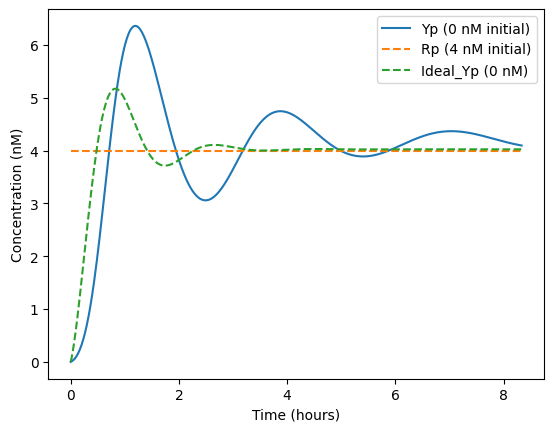

In [30]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal', 
               x='time', 
               ys=['Yp', 'Ideal_Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

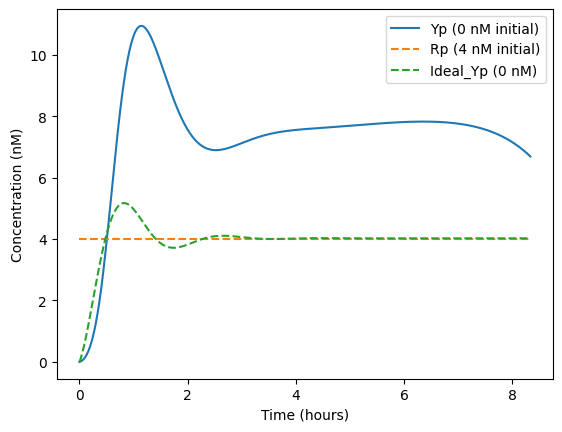

In [31]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky', 
               x='time', 
               ys=['Yp', 'Ideal_Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

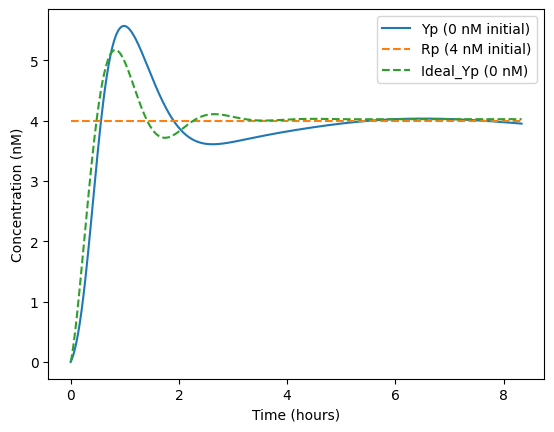

In [32]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky_shadow', 
               x='time', 
               ys=['Yp', 'Ideal_Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

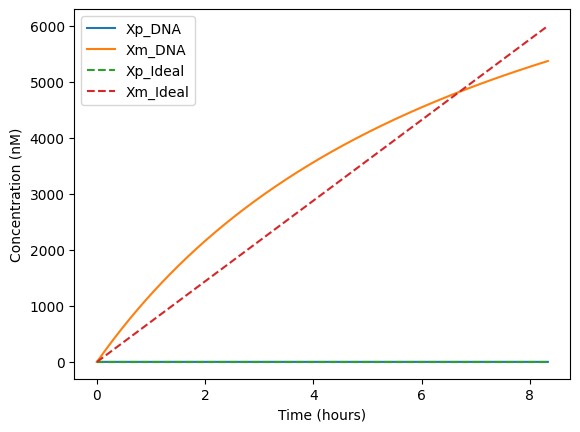

In [40]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r8_prod', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Xp_DNA', 'Xm_DNA', 'Xp_Ideal', 'Xm_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

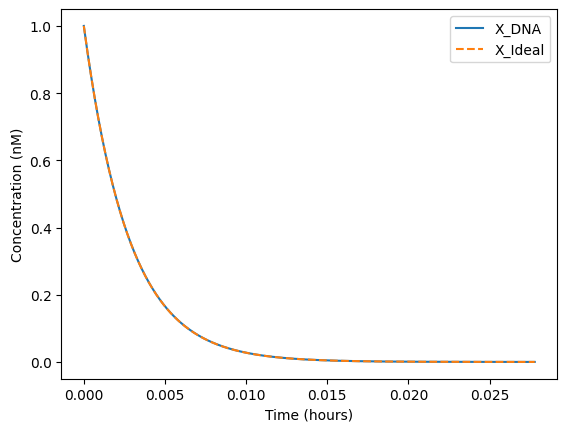

In [41]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r9_cons', 
               x='time', 
               ys=['X1', 'O1'],
               labels=['X_DNA', 'X_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

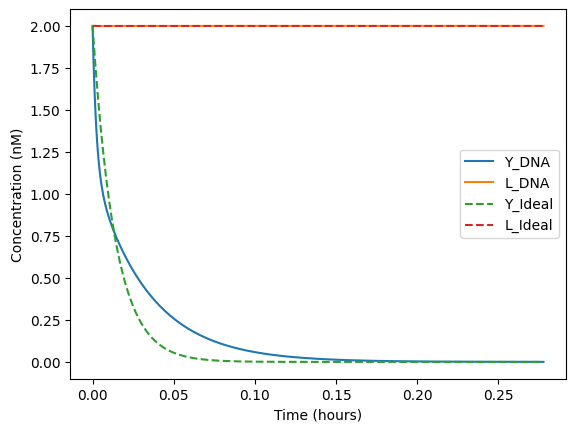

In [42]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r10_load', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Y_DNA', 'L_DNA', 'Y_Ideal', 'L_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Leak Perturbation

In [292]:
FOLDER='rps_v2_pert'
SUBFOLDER='pert_leak'

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/0/plots/rps_original_shadow_cancel_pert_leak-0.png


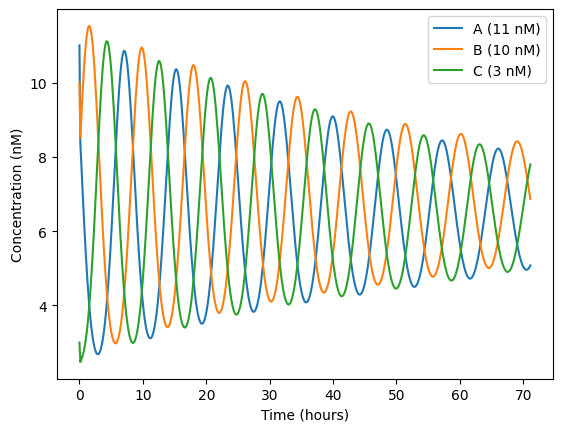

In [293]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/0/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-0',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/1/plots/rps_original_shadow_cancel_pert_leak-1.png


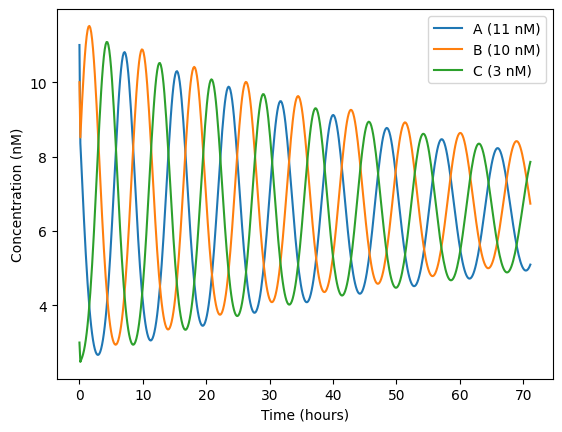

In [294]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/1/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-1',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/5/plots/rps_original_shadow_cancel_pert_leak-5.png


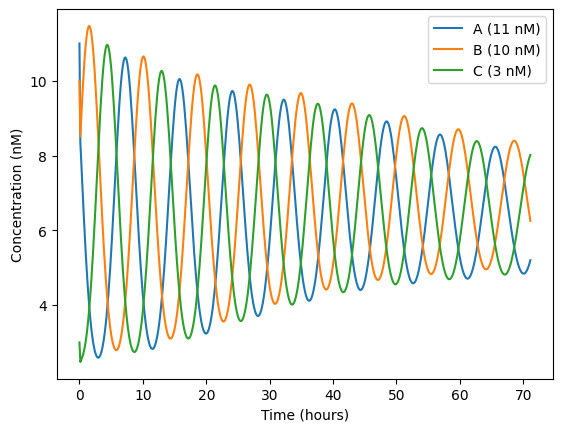

In [295]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/5/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-5',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/10/plots/rps_original_shadow_cancel_pert_leak-10.png


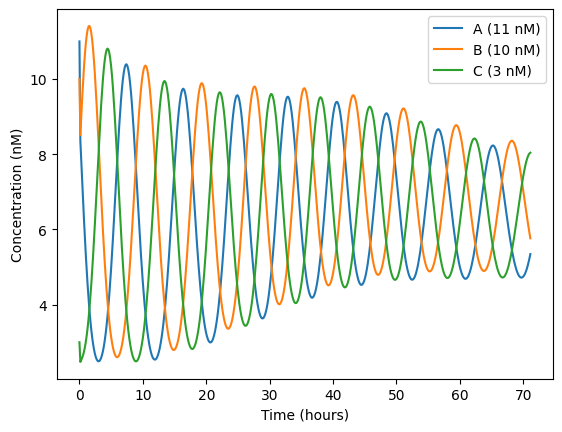

In [296]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/10/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-10',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/20/plots/rps_original_shadow_cancel_pert_leak-20.png


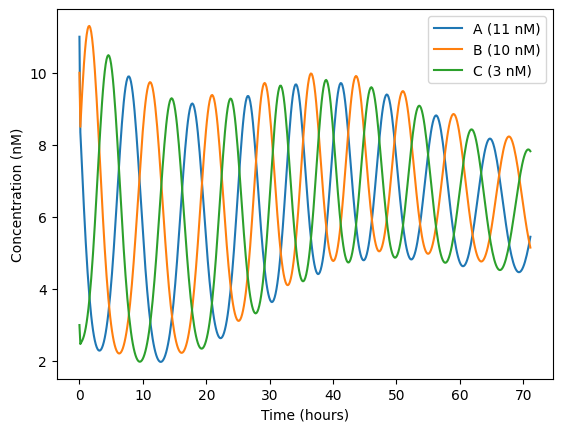

In [297]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/20/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-20',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/50/plots/rps_original_shadow_cancel_pert_leak-50.png


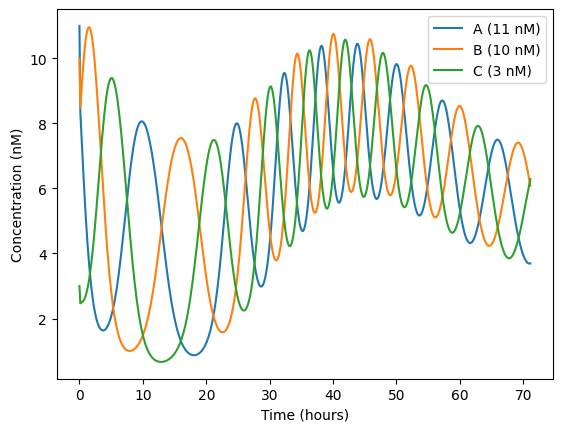

In [298]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/50/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-50',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/100/plots/rps_original_shadow_cancel_pert_leak-100.png


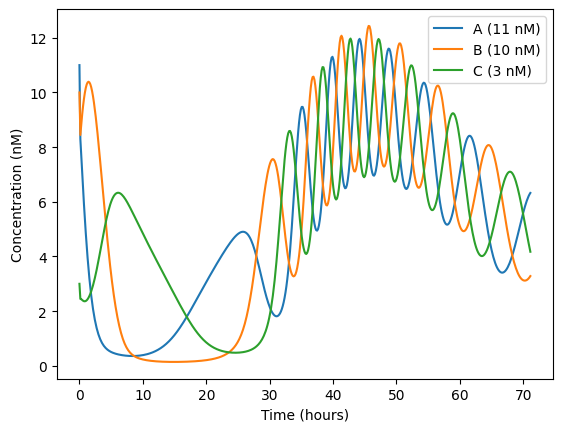

In [299]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/100/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_cancel_pert_leak-100',
               **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/0/plots/rps_orig_shadow_nocancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/1/plots/rps_orig_shadow_nocancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/5/plots/rps_orig_shadow_nocancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/10/plots/rps_orig_shadow_nocancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/p

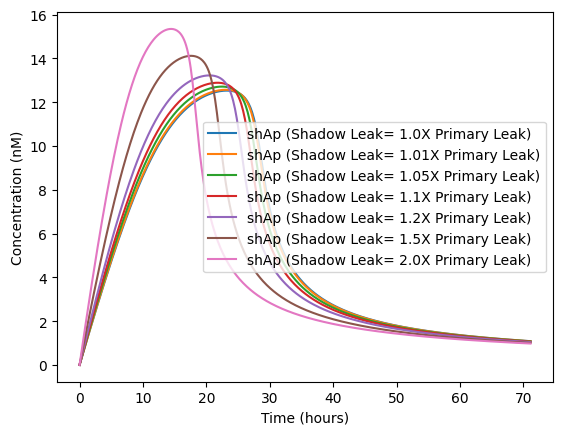

In [300]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_nocancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/0/plots/rps_orig_shadow_cancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/1/plots/rps_orig_shadow_cancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/5/plots/rps_orig_shadow_cancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/10/plots/rps_orig_shadow_cancel.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak

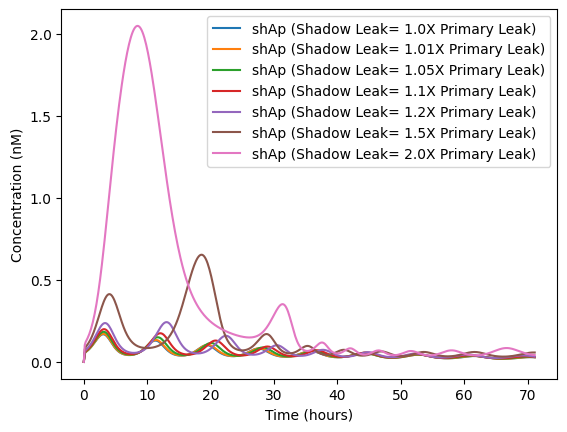

In [301]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_cancel',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

###  At a particular perturbation plot all the three species

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/50/plots/rps_orig_shadow_pert_nocancel_1.5X.png
['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/50/plots/rps_orig_shadow_pert_cancel_{labels[index]}.png


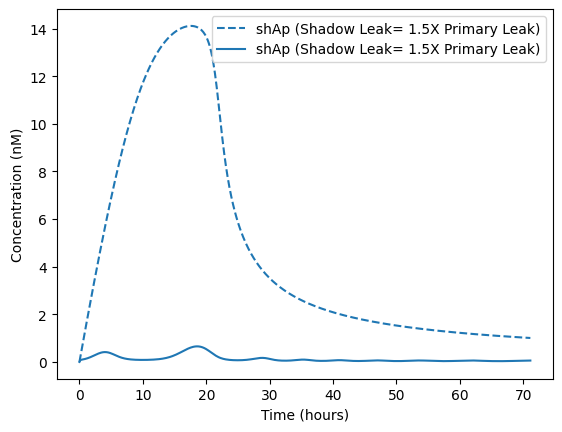

In [303]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['50']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shA': ['shAp', 'shAq']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shAp (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)

['time', 'Ap', 'Aq', 'Br', 'Bs', 'Cj', 'Ck', 'shAp', 'shAq', 'shBr', 'shBs', 'shCj', 'shCk']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps_v2_pert/pert_leak/1/plots/rps_orig_shadow_cancel_2X_withprimary.png


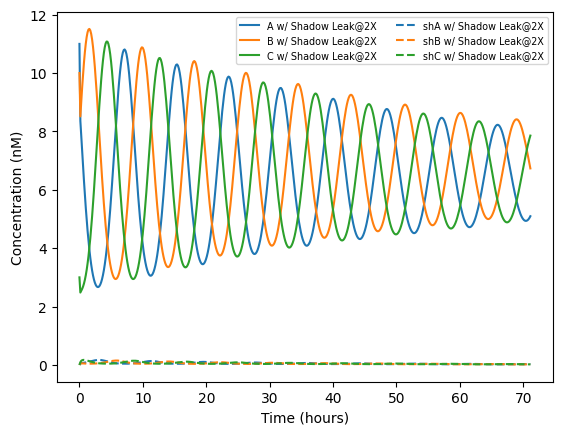

In [304]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'

Ys = {
        'A': ['Ap', 'Aq'],
        'B': ['Br', 'Bs'],
        'C': ['Cj', 'Ck'],
        'shA': ['shAp', 'shAq'],
        'shB': ['shBr', 'shBs'],
        'shC': ['shCj', 'shCk']
     }
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ Shadow Leak@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'rps_orig_shadow_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

In [305]:
FOLDER='biamp_pert'
SUBFOLDER='pert_leak'

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/0/plots/biamp_original_shadow_cancel_leak-0.png


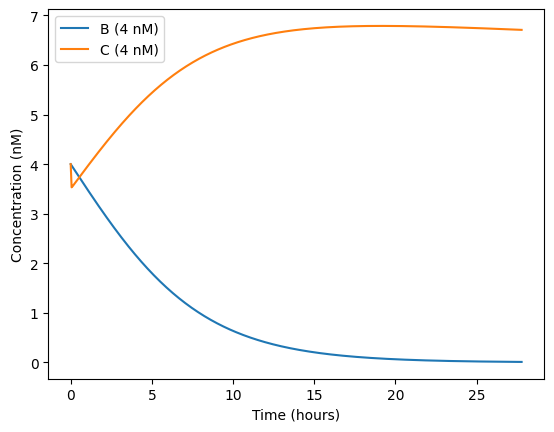

In [311]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/0/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-0',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/1/plots/biamp_original_shadow_cancel_leak-1.png


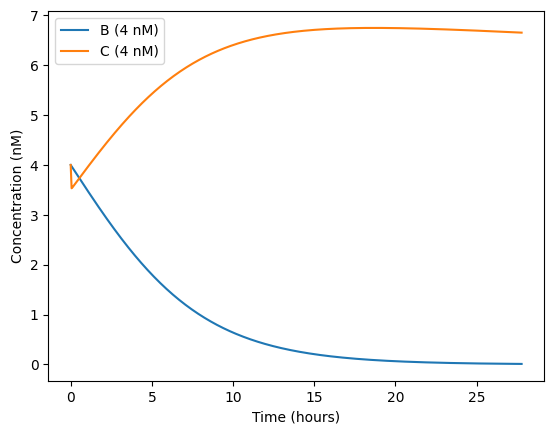

In [330]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/1/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-1',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/5/plots/biamp_original_shadow_cancel_leak-5.png


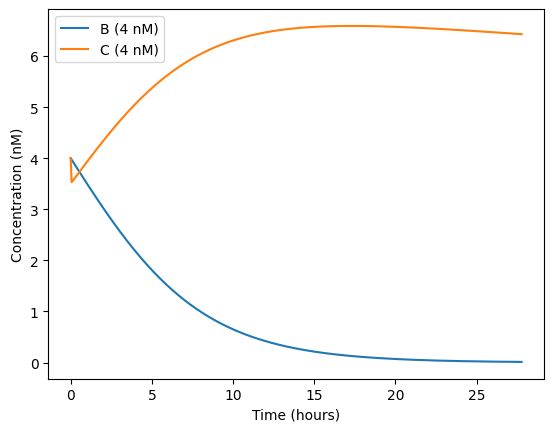

In [332]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/5/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-5',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/10/plots/biamp_original_shadow_cancel_leak-10.png


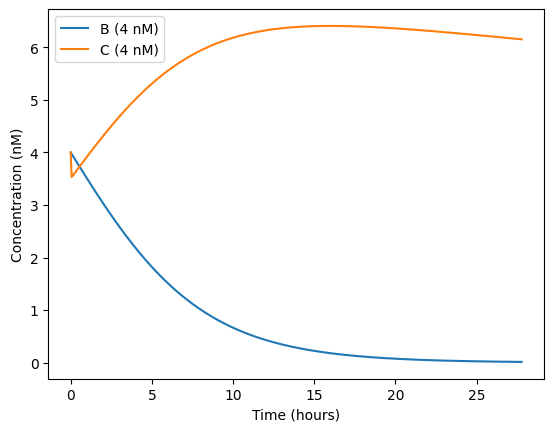

In [333]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/10/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-10',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_original_shadow_cancel_leak-20.png


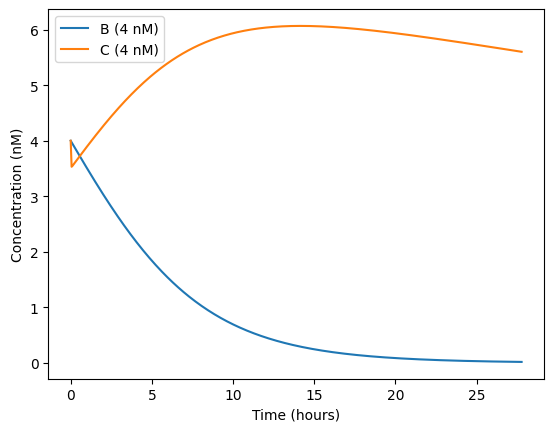

In [334]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/20/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-20',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/50/plots/biamp_original_shadow_cancel_leak-50.png


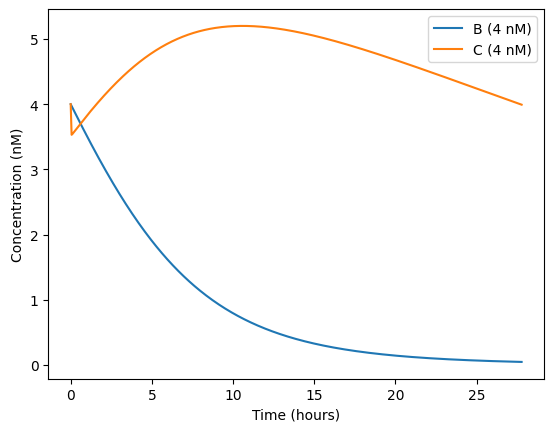

In [335]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/50/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-50',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/100/plots/biamp_original_shadow_cancel_leak-100.png


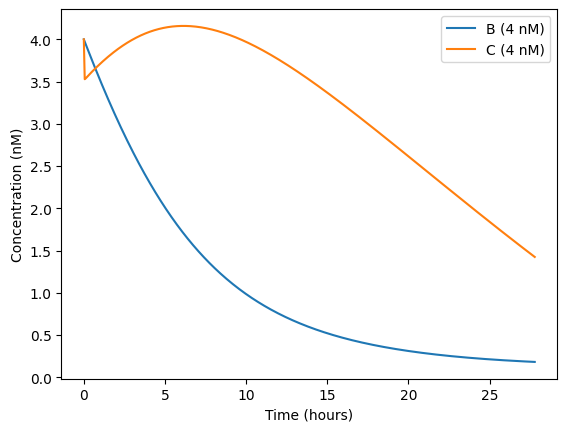

In [336]:
kwargs = {
}
df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/100/plots/orig_shadow_cancel', 
               x='time', 
               ys={
                   'B': ['Br'],
                   'C': ['Cj'],
               },
               labels=['B (4 nM)', 'C (4 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='biamp_original_shadow_cancel_leak-100',
               **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/0/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/1/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/5/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/10/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/50/plots/biamp_orig_shadow_nocancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users

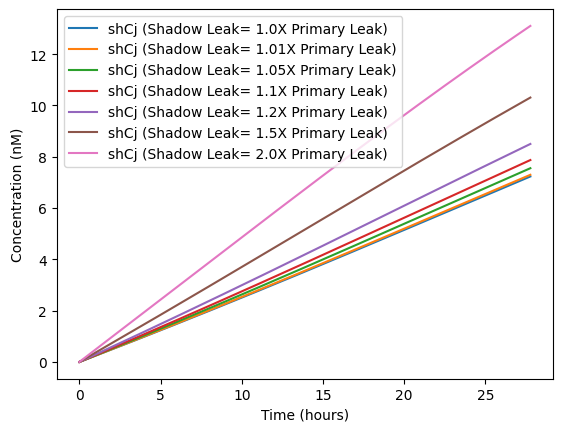

In [337]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shCj (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_nocancel_leak',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/0/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/1/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/5/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/10/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/50/plots/rps_orig_shadow_cancel_leak.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towar

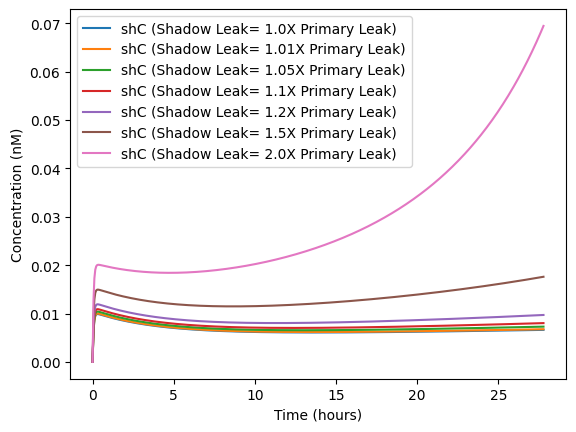

In [338]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_cancel_leak',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

## Plot combined

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/0/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/1/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/5/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/10/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_cancel_nocancel_combined.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/50/plots/biamp_orig_shadow_cancel

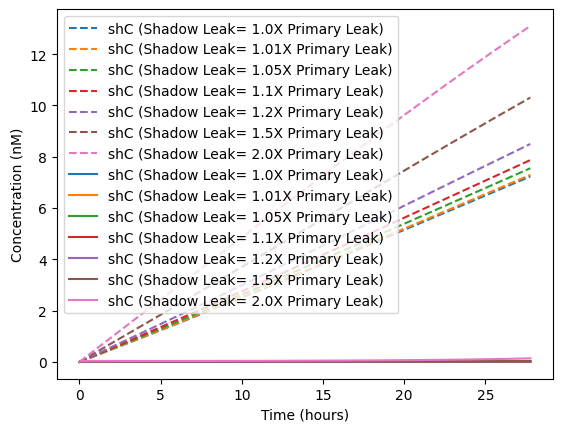

In [339]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0', '1', '5', '10', '20', '50', '100']
labels = [f'{1 + int(pert)/100}X' for pert in perts]
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_cancel_nocancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj', 'shCj']
                   },
                   labels=[f'shC (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='biamp_orig_shadow_cancel_nocancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_nocancel_1.2X.png
['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_cancel_1.2X.png


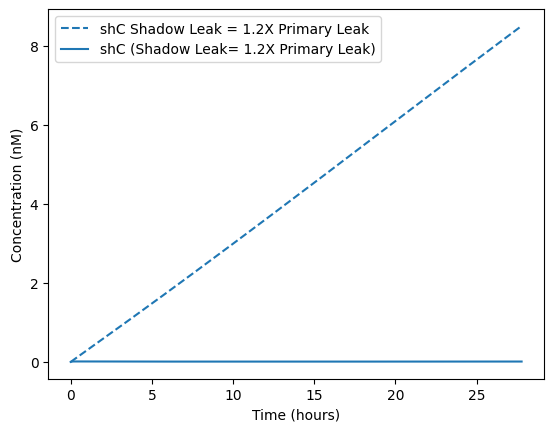

In [340]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['20']
labels = ['1.2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shC': ['shCj']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Shadow Leak = {labels[index]} Primary Leak' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'biamp_orig_shadow_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys={
                       'shC': ['shCj']
                   },
                   labels=[f'shC (Shadow Leak= {labels[index]} Primary Leak)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'biamp_orig_shadow_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)

['time', 'Cj', 'Br', 'shBr', 'shCj']
/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp_pert/pert_leak/20/plots/biamp_orig_shadow_cancel_1.2X_withprimary.png


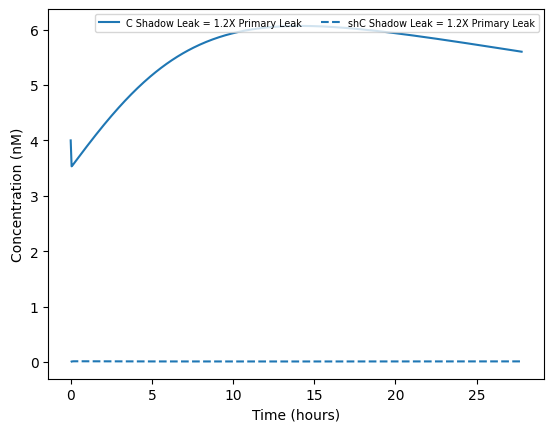

In [342]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['20']
labels = ['1.2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'

Ys = {
        'C': ['Cj'],
        'shC': ['shCj']
     }
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/{FOLDER}/{SUBFOLDER}/{pert}/plots/orig_shadow_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Shadow Leak = {labels[index]} Primary Leak' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid', 'dashed'], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'biamp_orig_shadow_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)